**Problem Statement**

**The tourism industry is changing fast and this is attracting a lot more travelers each year. The airline industry is considered as one of the most sophisticated industry in using complex pricing strategies. Now-a-days flight prices are quite unpredictable. The ticket prices change frequently. Customers are seeking to get the lowest price for their ticket, while airline companies are trying to keep their overall revenue as high as possible. Using technology it is actually possible to reduce the uncertainty of flight prices. So here we will be predicting the flight prices using efficient machine learning techniques.**

**Features**

* **Date: The date of the journey**

* **Airline Name: The name of the airline.**

* **Source: The source from which the service begins.**

* **Departure From: The palce or airport from where journey begins.**

* **Destination: The place or airport where the journey ends.**

* **Departure Time: The time when the journey starts from the airport.**

* **Arrival Time: Time of arrival at the airport.**

* **Duration: Total duration of the flight.**

* **Total_Stops: Total stops between the deaprture from and destination.**

**Target**

* **Price: The price of the ticket.**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
data=pd.read_csv('FLIGHT_PRICE_PREDICTION')

In [3]:
#checking overview of the dataset
data.head()

,Unnamed: 0,Date,Airline Name,Source,Departure From,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
0,0,Fri 3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,15:20,17:50,2h 30m,direct,"6,034"
1,1,Fri 3/2,GoFirst,Agoda.com,GOI Goa Intl,DEL Indira Gandhi Intl,00:35,03:00,2h 25m,direct,"4,722"
2,2,Fri 3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,13:10,15:40,2h 30m,direct,"6,034"
3,3,Fri 3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,14:15,16:45,2h 30m,direct,"6,034"
4,4,Fri 3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,19:40,22:20,2h 40m,direct,"6,034"


In [4]:
#checking shape
data.shape

(1558, 11)

**So we can see that there are 1558 rows and 11 columns in the dataset.**

In [5]:
#Dropping column unnamed: 0
data=data.drop(['Unnamed: 0'],axis=1)
data

,Date,Airline Name,Source,Departure From,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
0,Fri 3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,15:20,17:50,2h 30m,direct,"6,034"
1,Fri 3/2,GoFirst,Agoda.com,GOI Goa Intl,DEL Indira Gandhi Intl,00:35,03:00,2h 25m,direct,"4,722"
2,Fri 3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,13:10,15:40,2h 30m,direct,"6,034"
3,Fri 3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,14:15,16:45,2h 30m,direct,"6,034"
4,Fri 3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,19:40,22:20,2h 40m,direct,"6,034"
...,...,...,...,...,...,...,...,...,...,...
1553,Tue 7/2,"Alaska Seaplanes, SpiceJet",Hahn Air Systems,GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,"37,114"
1554,Tue 7/2,"Alaska Seaplanes, SpiceJet",Hahn Air Systems,GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30+1,10h 40m,1 stop,"37,114"
1555,Tue 7/2,"Alaska Seaplanes, SpiceJet",Hahn Air Systems,GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20+1,13h 30m,1 stop,"37,114"
1556,Tue 7/2,"Alaska Seaplanes, SpiceJet",Hahn Air Systems,GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:20,18h 10m,1 stop,"37,114"


**Dropped column Unnamed: 0 as it was just an numerical value which will be irrelevant at the time of prediction.**

In [6]:
#Checking for null values
data.isna().sum()

Date              0
Airline Name      0
Source            0
Departure From    0
Destination       0
Departure Time    0
Arrival Time      0
Duration          0
Total Stops       0
Price             0
dtype: int64

**So we can see that null value are not present in the dataset.**

In [7]:
#checking for duplicates
data.duplicated().sum()

52

**So we can see that there are 5 duplicates in the dataset.**

In [8]:
#Removing duplicates
data.drop_duplicates(inplace=True)
data.shape

(1506, 10)

**So we can see that duplicates have been dropped.**

In [9]:
#checking for columns
data.columns

Index(['Date', 'Airline Name', 'Source', 'Departure From', 'Destination',
       'Departure Time', 'Arrival Time', 'Duration', 'Total Stops', 'Price'],
      dtype='object')

**So we can see the names of the columns which are there in dataset.**

In [10]:
#checking for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1557
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1506 non-null   object
 1   Airline Name    1506 non-null   object
 2   Source          1506 non-null   object
 3   Departure From  1506 non-null   object
 4   Destination     1506 non-null   object
 5   Departure Time  1506 non-null   object
 6   Arrival Time    1506 non-null   object
 7   Duration        1506 non-null   object
 8   Total Stops     1506 non-null   object
 9   Price           1506 non-null   object
dtypes: object(10)
memory usage: 129.4+ KB


**In this we can see that all the columns have object data type but column price have continuous data.**

In [11]:
#replacing commas
data['Price']=data['Price'].str.replace(',','')

In [12]:
#checking dataset
data.head()

,Date,Airline Name,Source,Departure From,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
0,Fri 3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,15:20,17:50,2h 30m,direct,6034
1,Fri 3/2,GoFirst,Agoda.com,GOI Goa Intl,DEL Indira Gandhi Intl,00:35,03:00,2h 25m,direct,4722
2,Fri 3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,13:10,15:40,2h 30m,direct,6034
3,Fri 3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,14:15,16:45,2h 30m,direct,6034
4,Fri 3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,19:40,22:20,2h 40m,direct,6034


**So we can see that commas have been replaced.**

In [13]:
#Changing the datatype of the column price to int
data['Price']=data['Price'].astype(int)

In [14]:
#checking data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1557
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1506 non-null   object
 1   Airline Name    1506 non-null   object
 2   Source          1506 non-null   object
 3   Departure From  1506 non-null   object
 4   Destination     1506 non-null   object
 5   Departure Time  1506 non-null   object
 6   Arrival Time    1506 non-null   object
 7   Duration        1506 non-null   object
 8   Total Stops     1506 non-null   object
 9   Price           1506 non-null   int32 
dtypes: int32(1), object(9)
memory usage: 123.5+ KB


**So we can see that data type of column price have been changed from object to integer type.**

# UNIQUE VALUES

In [15]:
#checking for unique values 
data['Date'].unique()

array(['Fri 3/2', 'Sat 4/2', 'Sun 5/2', 'Mon 6/2', 'Tue 7/2'],
      dtype=object)

**So we can see that we have a data of flights from date 3rd february to 7 february.**

In [16]:
#checking for unique values 
data['Airline Name'].unique()

array(['IndiGo', 'GoFirst', 'SpiceJet', 'AirAsia India', 'Vistara',
       'Air India', 'FlexFlight', 'AirAsia India, Air India',
       'Hahn Air Systems', 'GoFirst, IndiGo', 'Air India, IndiGo',
       'Vistara, Etihad Airways', 'Qatar Airways', 'Alaska Seaplanes',
       'Alaska Seaplanes, SpiceJet', 'GoFirst, Air India',
       'AirAsia India, GoFirst', 'AirAsia India, Vistara', 'Oman Air',
       'Air India, Vistara', 'GoFirst, Akasa Air', 'IndiGo, Air India',
       'IndiGo, GoFirst', 'AirAsia India, IndiGo', 'Multiple Airlines',
       'Vistara, Air India', 'Vistara, IndiGo', 'IndiGo, Akasa Air',
       'IndiGo, AirAsia India', 'GoFirst, AirAsia India',
       'GoFirst, Vistara', 'Vistara, GoFirst', 'IndiGo, Vistara',
       'SpiceJet, IndiGo'], dtype=object)

**This column gives us the information about the names of the airline or the comapany of the airline which they belong.**

In [17]:
#checking for unique values 
data['Source'].unique()

array(['Travomint', 'Agoda.com', 'EaseMyTrip', 'FlightNetwork',
       'happyfares', 'Bravofly', 'Gotogate', 'BudgetAir', 'Kiwi.com',
       'FlightsMojo', 'Qatar Airways', 'Hahn Air Systems', 'eDreams',
       'Booking.com'], dtype=object)

**This column gives us the information about the price which we have got taken from which booking site.**

In [18]:
#checking for unique values 
data['Departure From'].unique()

array(['GOI Goa Intl', 'GOIGoa Intl'], dtype=object)

**This column gives us the information about the place of departure.**

In [19]:
#checking for unique values 
data['Destination'].unique()

array(['DEL Indira Gandhi Intl', 'DELIndira Gandhi Intl'], dtype=object)

**This column gives us the information about the place of the destination.**

In [20]:
#checking for unique values 
data['Departure Time'].unique()

array(['15:20', '00:35', '13:10', '14:15', '19:40', '19:55', '08:10',
       '16:35', '17:40', '14:25', '14:05', '01:15', '20:55', '15:25',
       '23:05', '22:30', '18:05', '21:55', '06:50', '19:05', '17:05',
       '14:45', '06:45', '18:45', '13:20', '13:05', '18:15', '07:15',
       '13:15', '05:10', '08:00', '00:50', '23:15', '08:05', '17:10',
       '18:30', '17:55', '14:35', '15:05', '07:35', '14:40', '05:45',
       '13:55', '16:30', '23:55', '06:40', '14:00', '05:55', '22:50',
       '19:10', '04:20', '23:45', '23:10', '22:45', '02:10', '23:40',
       '19:50', '22:20', '01:20', '22:05', '19:15', '21:05', '07:30',
       '04:05', '02:05', '12:25', '18:00', '10:25', '11:50', '08:35',
       '11:00', '01:00', '09:15'], dtype=object)

**This column gives us the information about the time of departure, meaning when the flight is going to take off.**

In [21]:
#checking for unique values 
data['Arrival Time'].unique()

array(['17:50', '03:00', '15:40', '16:45', '22:20', '22:35', '10:45',
       '19:10', '20:20', '17:05', '16:40', '03:50', '23:50', '18:05',
       '01:45', '01:00', '22:15', '00:40', '11:20', '00:50', '23:30',
       '20:45', '12:15', '11:45', '21:20', '00:05', '17:35', '01:05',
       '02:00', '14:20', '00:35', '22:50', '19:50', '23:40', '12:20',
       '15:55', '07:30', '05:45', '14:50', '22:55', '15:00', '15:15',
       '00:25', '12:40', '14:15', '20:50', '20:40', '10:15', '19:30',
       '22:10', '01:10', '20:30', '21:25', '01:35', '19:45', '20:15',
       '08:00', '00:15', '10:55', '12:05', '01:25', '22:25', '21:15',
       '09:30', '07:50', '09:05', '07:40', '00:55', '07:15', '17:55',
       '18:40', '09:15', '12:50', '14:45', '16:15', '08:35', '09:40',
       '11:00', '11:10', '08:20', '09:20', '18:00', '23:35', '07:55',
       '08:55', '22:40', '14:30', '23:45', '22:30', '01:40', '00:10',
       '23:00', '21:55', '21:00', '23:05', '04:45', '10:05', '23:20',
       '20:00', '16:

**This column gives us the information about the time of arrival meaning when the flight is going to reach the destination.**

In [22]:
#checking for unique values 
data['Duration'].unique()

array(['2h 30m', '2h 25m', '2h 40m', '2h 35m', '2h 55m', '4h 10m',
       '2h 45m', '4h 30m', '5h 45m', '6h 25m', '6h 00m', '5h 25m',
       '4h 55m', '5h 00m', '5h 55m', '5h 20m', '4h 45m', '6h 50m',
       '7h 45m', '8h 00m', '8h 55m', '7h 05m', '6h 30m', '8h 05m',
       '6h 35m', '7h 10m', '7h 55m', '6h 40m', '6h 45m', '8h 10m',
       '8h 25m', '6h 10m', '7h 30m', '5h 15m', '6h 15m', '7h 40m',
       '6h 20m', '5h 50m', '7h 15m', '7h 20m', '5h 30m', '13h 10m',
       '13h 45m', '10h 15m', '11h 00m', '12h 10m', '10h 40m', '13h 30m',
       '9h 10m', '11h 50m', '12h 45m', '13h 15m', '12h 40m', '10h 35m',
       '8h 15m', '8h 40m', '11h 35m', '10h 10m', '11h 05m', '10h 05m',
       '13h 05m', '8h 30m', '10h 25m', '9h 05m', '11h 25m', '9h 25m',
       '9h 50m', '10h 55m', '12h 15m', '12h 00m', '8h 35m', '11h 10m',
       '7h 35m', '8h 45m', '10h 50m', '11h 40m', '9h 40m', '12h 30m',
       '8h 20m', '5h 35m', '9h 30m', '10h 20m', '14h 55m', '14h 50m',
       '15h 35m', '15h 00m', '16h

**This column gives us the information about the duaration taken by flight to reach the destination.**

In [23]:
#checking for unique values 
data['Total Stops'].unique()

array(['direct', '1 stop', '2 stops', '3 stops'], dtype=object)

**This column gives us the information about the stops taken while travelling to the destination.**

In [24]:
#checking for unique values 
data['Price'].unique()

array([  6034,   4722,   6216,   6317,   6462,   7097,   7680,   4887,
         6006,   7056,   5423,   6463,   7700,   7269,   8152,  10823,
         5894,   5901,   6277,   8193,   8378,   8467,   9805,  11110,
        12298,   6508,   6547,   6928,   7291,   7293,   7446,   7740,
         7778,   7903,   8215,   8545,   8549,   8761,   9143,   9233,
         9391,   9479,   9635,   9683,   9699,   9714,   9941,  10444,
        10846,  11442,  11590,  11599,  12491,  13375,  15091,  20341,
        20554,   6150,   6179,   6616,   7034,   7326,   7349,   7398,
         7522,   7546,   7943,   7948,   8255,   8381,   8453,   8484,
         8563,   8697,   8716,   8737,   8766,   9218,   9743,  10059,
        10097,  10146,  10406,  10513,  10606,  10626,  10672,  10678,
        10781,  10856,  11030,  11698,  11868,  11965,  12137,  12190,
        12631,  12760,  12986,  13802,  14062,  14137,  14756,  15108,
        16169,  16449,  17982,  21871,   7603,   7811,   8082,   8103,
      

**This column gives us the information about the price of the flight.**

# NUMBER OF UNIQUE VALUES

In [25]:
#checking for numbers of unique va.ues
data.nunique()

Date                5
Airline Name       34
Source             14
Departure From      2
Destination         2
Departure Time     73
Arrival Time      250
Duration          235
Total Stops         4
Price             791
dtype: int64

In [26]:
#Splitting the date so that only day and month remains
data['Date']=data['Date'].str.split(' ').str[1]
data['Date']

0       3/2
1       3/2
2       3/2
3       3/2
4       3/2
       ... 
1553    7/2
1554    7/2
1555    7/2
1556    7/2
1557    7/2
Name: Date, Length: 1506, dtype: object

In [27]:
#Extraxting day
data['Day']=pd.to_datetime(data.Date,format='%d/%m').dt.day

In [28]:
#extracting month
data['Month']=pd.to_datetime(data.Date,format='%d/%m').dt.month

In [29]:
data.head()

,Date,Airline Name,Source,Departure From,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Day,Month
0,3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,15:20,17:50,2h 30m,direct,6034,3,2
1,3/2,GoFirst,Agoda.com,GOI Goa Intl,DEL Indira Gandhi Intl,00:35,03:00,2h 25m,direct,4722,3,2
2,3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,13:10,15:40,2h 30m,direct,6034,3,2
3,3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,14:15,16:45,2h 30m,direct,6034,3,2
4,3/2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,19:40,22:20,2h 40m,direct,6034,3,2


In [30]:
#dropping column Date
data=data.drop(['Date'],axis=1)
data.head(2)

,Airline Name,Source,Departure From,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Day,Month
0,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,15:20,17:50,2h 30m,direct,6034,3,2
1,GoFirst,Agoda.com,GOI Goa Intl,DEL Indira Gandhi Intl,00:35,03:00,2h 25m,direct,4722,3,2


In [31]:
#extracting hour
data['Departure_Hour']=pd.to_datetime(data['Departure Time']).dt.hour

In [32]:
#extractiong minute
data['Departure_Minute']=pd.to_datetime(data['Departure Time']).dt.minute

In [33]:
data.head()

,Airline Name,Source,Departure From,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Day,Month,Departure_Hour,Departure_Minute
0,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,15:20,17:50,2h 30m,direct,6034,3,2,15,20
1,GoFirst,Agoda.com,GOI Goa Intl,DEL Indira Gandhi Intl,00:35,03:00,2h 25m,direct,4722,3,2,0,35
2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,13:10,15:40,2h 30m,direct,6034,3,2,13,10
3,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,14:15,16:45,2h 30m,direct,6034,3,2,14,15
4,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,19:40,22:20,2h 40m,direct,6034,3,2,19,40


In [34]:
#dropping column departure time
data=data.drop(['Departure Time'],axis=1)
data.head(2)

,Airline Name,Source,Departure From,Destination,Arrival Time,Duration,Total Stops,Price,Day,Month,Departure_Hour,Departure_Minute
0,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,17:50,2h 30m,direct,6034,3,2,15,20
1,GoFirst,Agoda.com,GOI Goa Intl,DEL Indira Gandhi Intl,03:00,2h 25m,direct,4722,3,2,0,35


In [35]:
#Replacing + with space
data['Arrival Time']=data['Arrival Time'].str.replace('+',' ')
data['Arrival Time']

0         17:50
1         03:00
2         15:40
3         16:45
4         22:20
         ...   
1553      12:20
1554    09:30 1
1555    12:20 1
1556      23:20
1557      19:50
Name: Arrival Time, Length: 1506, dtype: object

In [36]:
#splitting data so that it only shows  hours and minutes
data['Arrival Time']=data['Arrival Time'].str.split(' ').str[0]
data['Arrival Time']

0       17:50
1       03:00
2       15:40
3       16:45
4       22:20
        ...  
1553    12:20
1554    09:30
1555    12:20
1556    23:20
1557    19:50
Name: Arrival Time, Length: 1506, dtype: object

In [37]:
#checking if +1 is replaced or not
data['Arrival Time'].unique()

array(['17:50', '03:00', '15:40', '16:45', '22:20', '22:35', '10:45',
       '19:10', '20:20', '17:05', '16:40', '03:50', '23:50', '18:05',
       '01:45', '01:00', '22:15', '00:40', '11:20', '00:50', '23:30',
       '20:45', '12:15', '11:45', '21:20', '00:05', '17:35', '01:05',
       '02:00', '14:20', '00:35', '22:50', '19:50', '23:40', '12:20',
       '15:55', '07:30', '05:45', '14:50', '22:55', '15:00', '15:15',
       '00:25', '12:40', '14:15', '20:50', '20:40', '10:15', '19:30',
       '22:10', '01:10', '20:30', '21:25', '01:35', '19:45', '20:15',
       '08:00', '00:15', '10:55', '12:05', '01:25', '22:25', '21:15',
       '09:30', '07:50', '09:05', '07:40', '00:55', '07:15', '17:55',
       '18:40', '09:15', '12:50', '14:45', '16:15', '08:35', '09:40',
       '11:00', '11:10', '08:20', '09:20', '18:00', '23:35', '07:55',
       '08:55', '22:40', '14:30', '23:45', '22:30', '01:40', '00:10',
       '23:00', '21:55', '21:00', '23:05', '04:45', '10:05', '23:20',
       '20:00', '16:

**So we can see that +1 have been replaced.**

In [38]:
#extracting hour
data['Arrival_Hour']=pd.to_datetime(data['Arrival Time']).dt.hour

In [39]:
#extracting Minute
data['Arrival_Minute']=pd.to_datetime(data['Arrival Time']).dt.minute

In [40]:
data.head(2)

,Airline Name,Source,Departure From,Destination,Arrival Time,Duration,Total Stops,Price,Day,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,17:50,2h 30m,direct,6034,3,2,15,20,17,50
1,GoFirst,Agoda.com,GOI Goa Intl,DEL Indira Gandhi Intl,03:00,2h 25m,direct,4722,3,2,0,35,3,0


In [41]:
#dropping column arrival time
data=data.drop(['Arrival Time'],axis=1)
data.head(2)

,Airline Name,Source,Departure From,Destination,Duration,Total Stops,Price,Day,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,2h 30m,direct,6034,3,2,15,20,17,50
1,GoFirst,Agoda.com,GOI Goa Intl,DEL Indira Gandhi Intl,2h 25m,direct,4722,3,2,0,35,3,0


In [42]:
#splitting hours and transferring that data into durations hours and adding the column to the dataset
data['Duration_Hours']=data['Duration'].str.split(' ').str[0]
data['Duration_Hours']

0        2h
1        2h
2        2h
3        2h
4        2h
       ... 
1553     7h
1554    10h
1555    13h
1556    18h
1557     5h
Name: Duration_Hours, Length: 1506, dtype: object

In [43]:
#repalcing h with empty space
data['Duration_Hours']=data['Duration_Hours'].str.replace('h','')
data['Duration_Hours']

0        2
1        2
2        2
3        2
4        2
        ..
1553     7
1554    10
1555    13
1556    18
1557     5
Name: Duration_Hours, Length: 1506, dtype: object

In [44]:
#splitting Minutes and transferring that data into durations minutes and adding the column to the dataset
data['Duration_Minutes']=data['Duration'].str.split(' ').str[1]
data['Duration_Minutes']

0       30m
1       25m
2       30m
3       30m
4       40m
       ... 
1553    10m
1554    40m
1555    30m
1556    10m
1557    55m
Name: Duration_Minutes, Length: 1506, dtype: object

In [45]:
#repalcing m with empty space
data['Duration_Minutes']=data['Duration_Minutes'].str.replace('m','')
data['Duration_Minutes']

0       30
1       25
2       30
3       30
4       40
        ..
1553    10
1554    40
1555    30
1556    10
1557    55
Name: Duration_Minutes, Length: 1506, dtype: object

In [46]:
data.head()

,Airline Name,Source,Departure From,Destination,Duration,Total Stops,Price,Day,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,2h 30m,direct,6034,3,2,15,20,17,50,2,30
1,GoFirst,Agoda.com,GOI Goa Intl,DEL Indira Gandhi Intl,2h 25m,direct,4722,3,2,0,35,3,0,2,25
2,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,2h 30m,direct,6034,3,2,13,10,15,40,2,30
3,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,2h 30m,direct,6034,3,2,14,15,16,45,2,30
4,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,2h 40m,direct,6034,3,2,19,40,22,20,2,40


In [47]:
#dropping column duration
data=data.drop(['Duration'],axis=1)
data.head(2)

,Airline Name,Source,Departure From,Destination,Total Stops,Price,Day,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Travomint,GOI Goa Intl,DEL Indira Gandhi Intl,direct,6034,3,2,15,20,17,50,2,30
1,GoFirst,Agoda.com,GOI Goa Intl,DEL Indira Gandhi Intl,direct,4722,3,2,0,35,3,0,2,25


In [48]:
#checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1557
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline Name      1506 non-null   object
 1   Source            1506 non-null   object
 2   Departure From    1506 non-null   object
 3   Destination       1506 non-null   object
 4   Total Stops       1506 non-null   object
 5   Price             1506 non-null   int32 
 6   Day               1506 non-null   int64 
 7   Month             1506 non-null   int64 
 8   Departure_Hour    1506 non-null   int64 
 9   Departure_Minute  1506 non-null   int64 
 10  Arrival_Hour      1506 non-null   int64 
 11  Arrival_Minute    1506 non-null   int64 
 12  Duration_Hours    1506 non-null   object
 13  Duration_Minutes  1506 non-null   object
dtypes: int32(1), int64(6), object(7)
memory usage: 170.6+ KB


In [49]:
#changing the data type of duration hours and duration minutes to integer
data['Duration_Hours']=data['Duration_Hours'].astype(int)
data['Duration_Minutes']=data['Duration_Minutes'].astype(int)

In [50]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1557
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline Name      1506 non-null   object
 1   Source            1506 non-null   object
 2   Departure From    1506 non-null   object
 3   Destination       1506 non-null   object
 4   Total Stops       1506 non-null   object
 5   Price             1506 non-null   int32 
 6   Day               1506 non-null   int64 
 7   Month             1506 non-null   int64 
 8   Departure_Hour    1506 non-null   int64 
 9   Departure_Minute  1506 non-null   int64 
 10  Arrival_Hour      1506 non-null   int64 
 11  Arrival_Minute    1506 non-null   int64 
 12  Duration_Hours    1506 non-null   int32 
 13  Duration_Minutes  1506 non-null   int32 
dtypes: int32(3), int64(6), object(5)
memory usage: 158.8+ KB


**So we can see that data type of duration hours and minutes have changed to integer type.**

In [51]:
#Appending categorical data columns into cat features
cat_features=[]
for i in data:
    if data[i].dtype=='object':
        cat_features.append(i)
print(cat_features)

['Airline Name', 'Source', 'Departure From', 'Destination', 'Total Stops']


In [52]:
#Appending continuous data columns into cont features
cont_features=[]
for i in data:
    if data[i].dtype!='object':
        cont_features.append(i)
print(cont_features)

['Price', 'Day', 'Month', 'Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours', 'Duration_Minutes']


# PLOTTING DISTRIBUTION PLOT

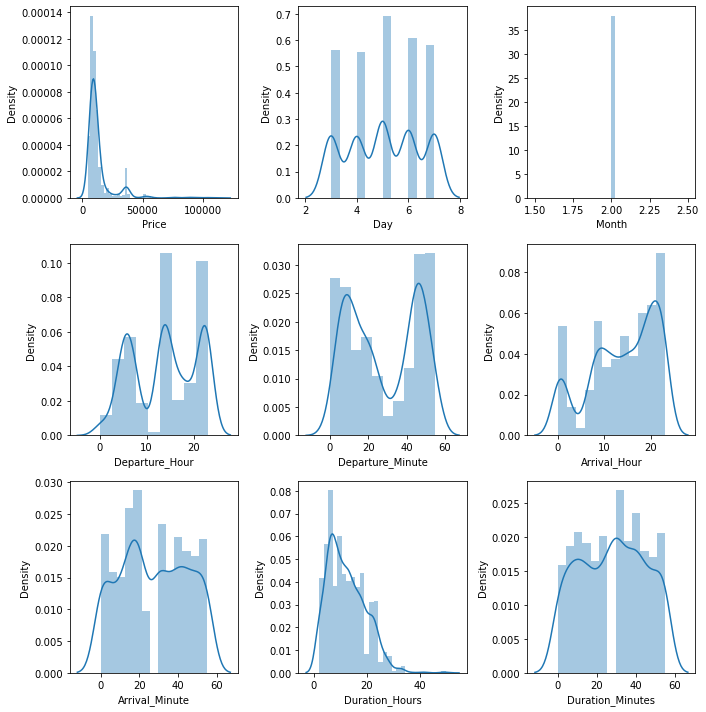

In [53]:
#plotting distribution plot
plt.figure(figsize=(10,10))
plotnumber=1
for column  in cont_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

**In the above plots we can see that in column arrival hour and duration skewness is present and also data is not distributed normally.**

# VALUE COUNTS OF CATEGORICAL DATA COLUMNS

In [57]:
#checking for value counts
for i in cat_features:
    print(data[i].value_counts())
    

Air India                     334
Vistara                       306
IndiGo                        210
AirAsia India                 159
SpiceJet                      141
GoFirst                       108
Hahn Air Systems               86
Alaska Seaplanes, SpiceJet     27
Qatar Airways                  20
Multiple Airlines              18
GoFirst, IndiGo                14
AirAsia India, Air India       12
IndiGo, GoFirst                 8
AirAsia India, GoFirst          7
AirAsia India, IndiGo           7
Air India, IndiGo               5
FlexFlight                      5
GoFirst, Air India              4
IndiGo, AirAsia India           4
Oman Air                        4
Air India, Vistara              4
Vistara, Etihad Airways         4
AirAsia India, Vistara          3
IndiGo, Air India               3
Alaska Seaplanes                3
GoFirst, Vistara                2
GoFirst, Akasa Air              1
Vistara, Air India              1
Vistara, IndiGo                 1
IndiGo, Akasa 

**In this column we can see the value counts of each categorical columns.**

# PLOTTING COUNT PLOTS

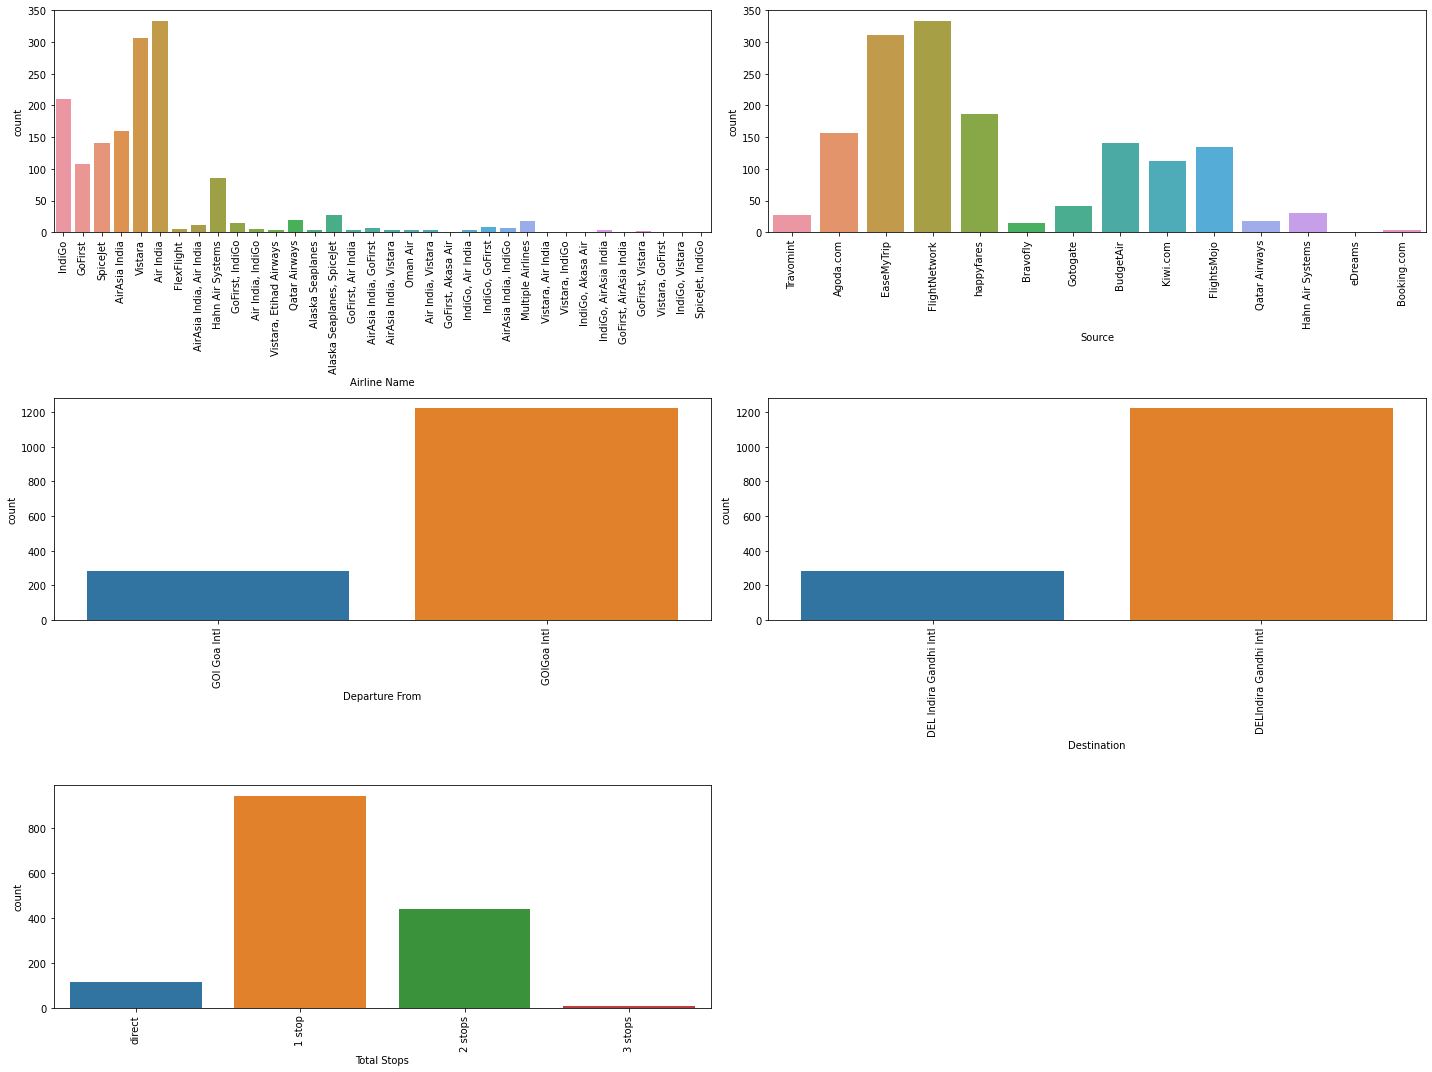

In [684]:
#plotting countplot
plt.figure(figsize=(20,15))
plotnumber=1
for column  in cat_features:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(data[column])
        plt.xticks(rotation='vertical')
    plotnumber+=1
plt.tight_layout()

**Observation**
* **In the above plots we can see that, the most of the flights which were going from goa to mumbai on 3rd feb,4th feb, 5th feb,6th feb and 7th feb was air asia.**
* **Most of the prices which we have got is from the source/site flight newtwork.**
* **All the flights Departure is from Goa airport and arrival is on Delhi indira gandhi airport.**
* **The data which we got from the date 3rd feb to 7th feb in this most of the flights will be taking 1 stop while travelling from goa to delhi, followed by 2 stops, than direct and least is the 3 stops.**



# PLOTTING BAR PLOTS

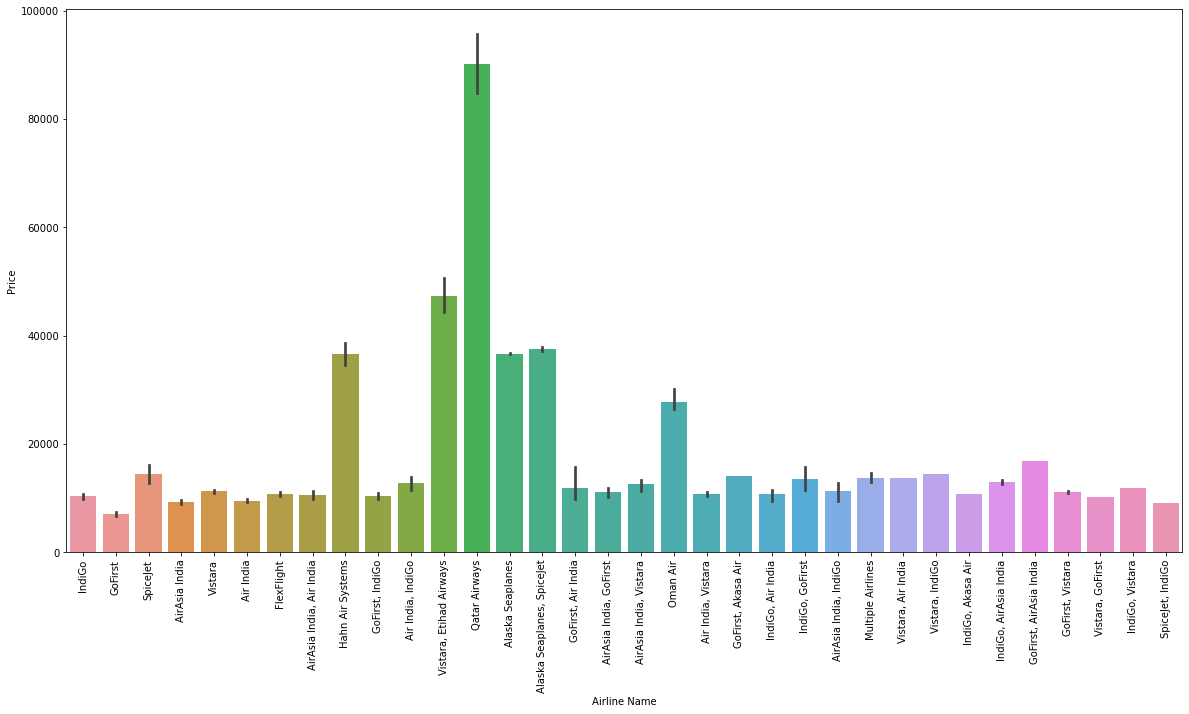

In [669]:
#Plotting barplot
plt.figure(figsize=(20,10))
sns.barplot(x=data['Airline Name'],y=data['Price'],data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that qatar airways have the highest prices for flight ticket which is more than 80000.**

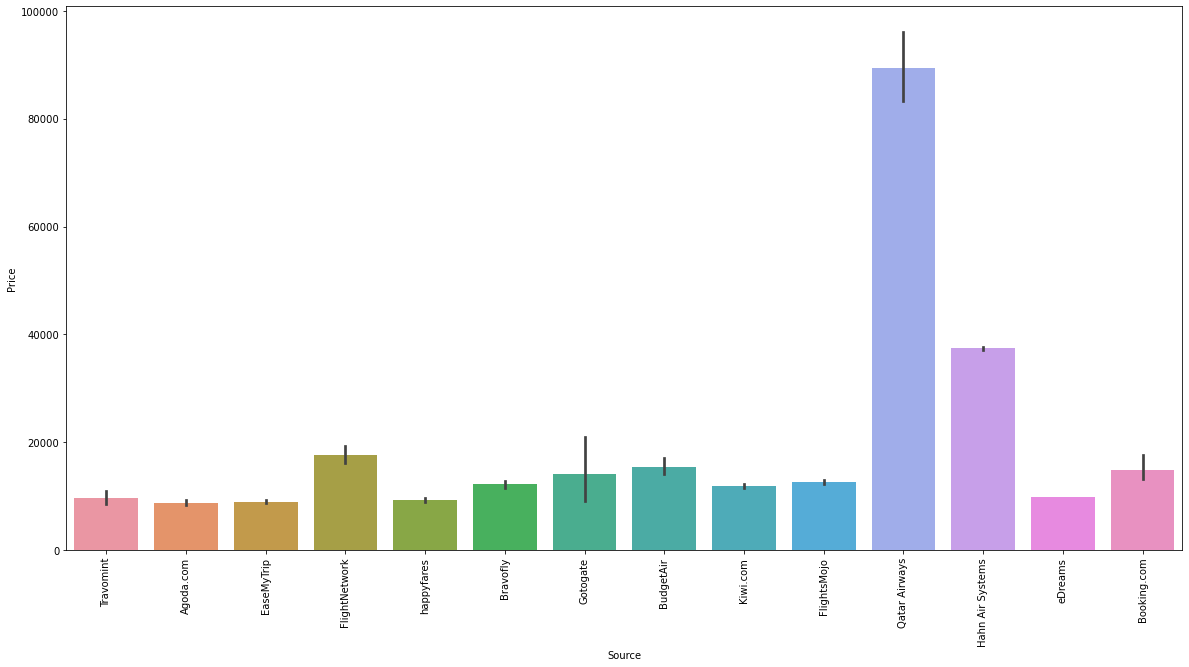

In [58]:
#Plotting barplot
plt.figure(figsize=(20,10))
sns.barplot(x=data['Source'],y=data['Price'],data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that source qatar airways showing highest prices for flight ticket.**

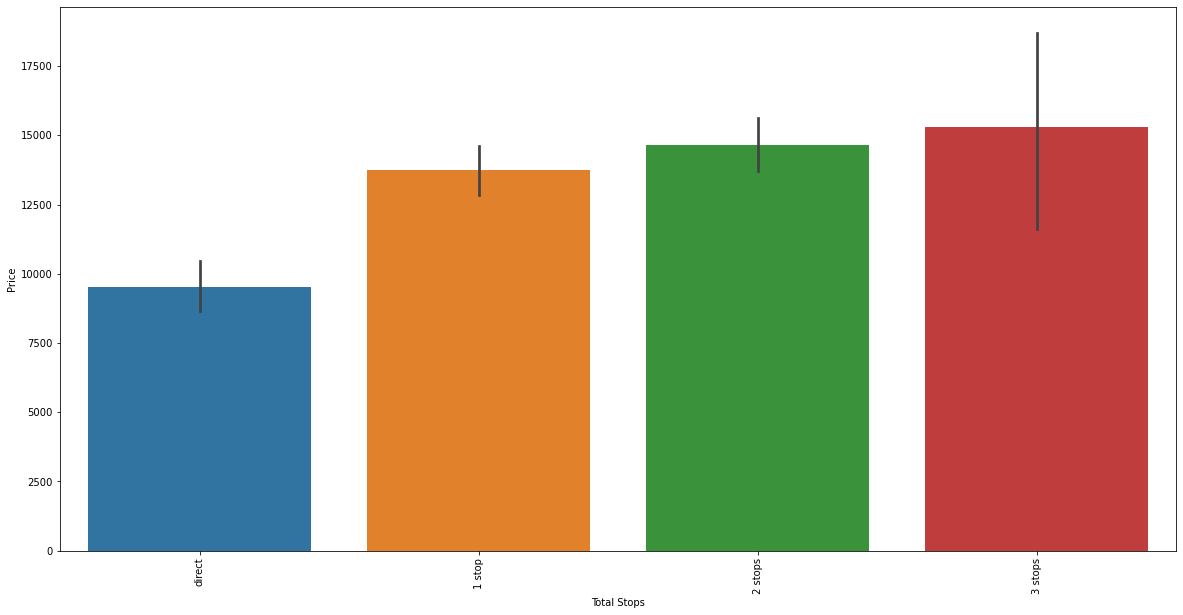

In [672]:
#Plotting barplot
plt.figure(figsize=(20,10))
sns.barplot(x=data['Total Stops'],y=data['Price'],data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that whenever there is a 3 stop inbetween while travelling from goa to delhi prices are higher as compared to others.**

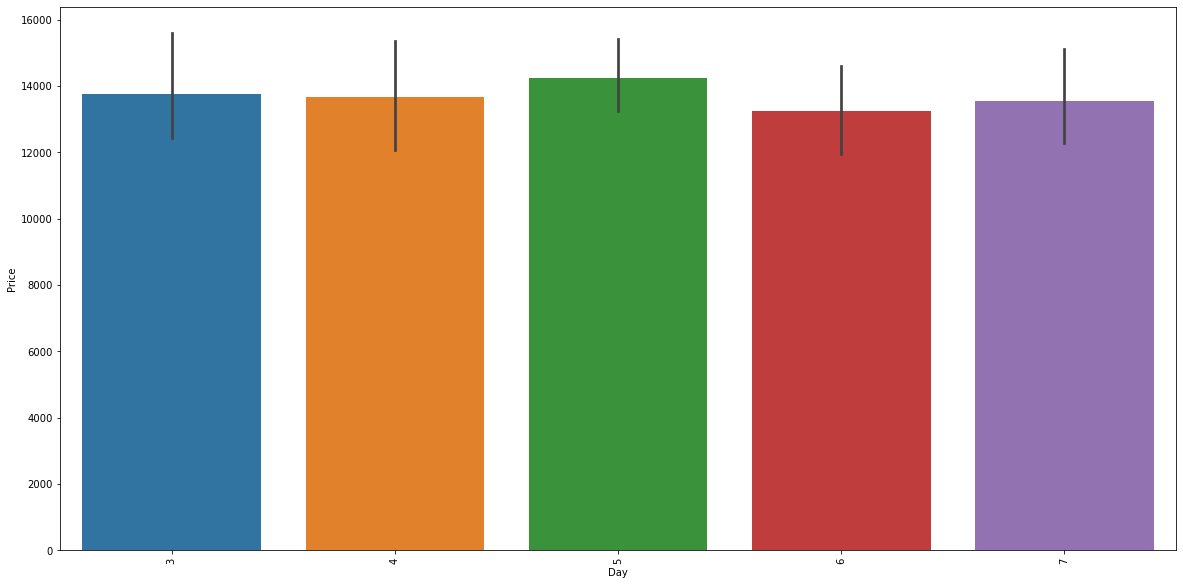

In [676]:
#Plotting barplot
plt.figure(figsize=(20,10))
sns.barplot(x=data['Day'],y=data['Price'],data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that on 5th feb prices of flight tickets are higher than the other dates may be because of sunday.**

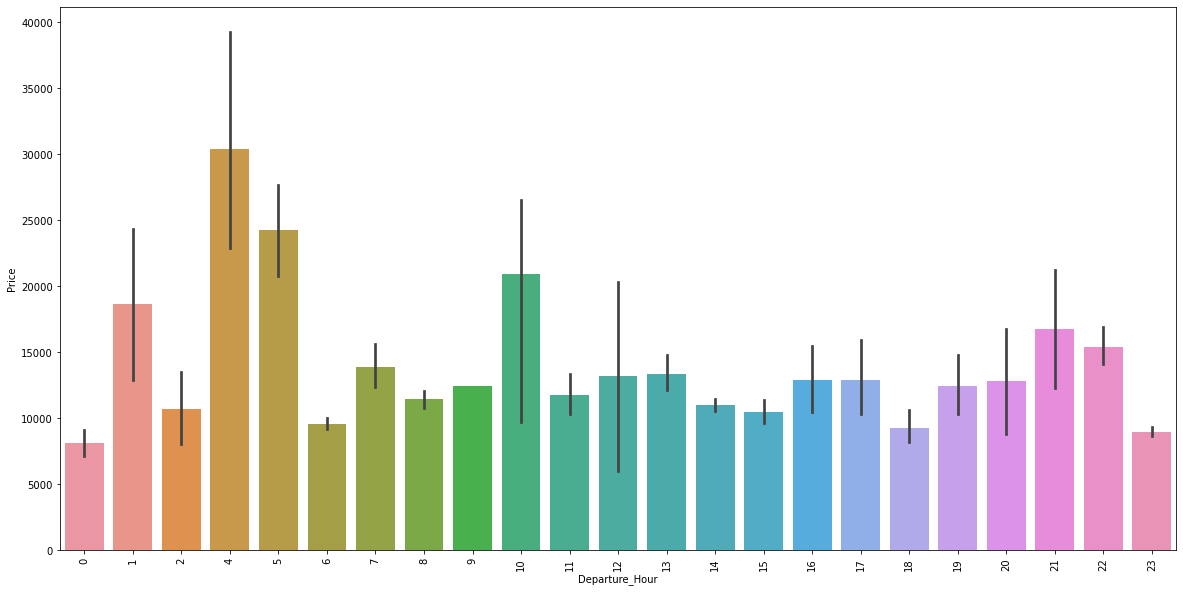

In [673]:
#Plotting barplot
plt.figure(figsize=(20,10))
sns.barplot(x=data['Departure_Hour'],y=data['Price'],data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that early morning ticket prices are higher that is at 4am ticket prices are higher as comoared to the other timings.** 

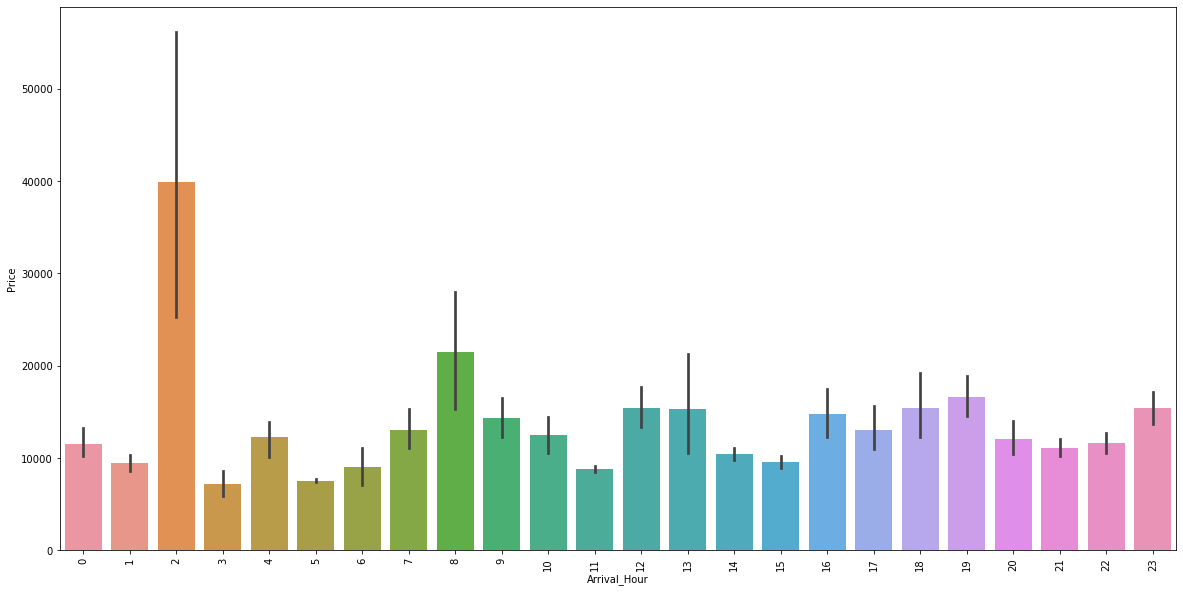

In [674]:
#Plotting barplot
plt.figure(figsize=(20,10))
sns.barplot(x=data['Arrival_Hour'],y=data['Price'],data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that whenever the arrival hour is at 2am the ticket prices are higher as compared to others.**

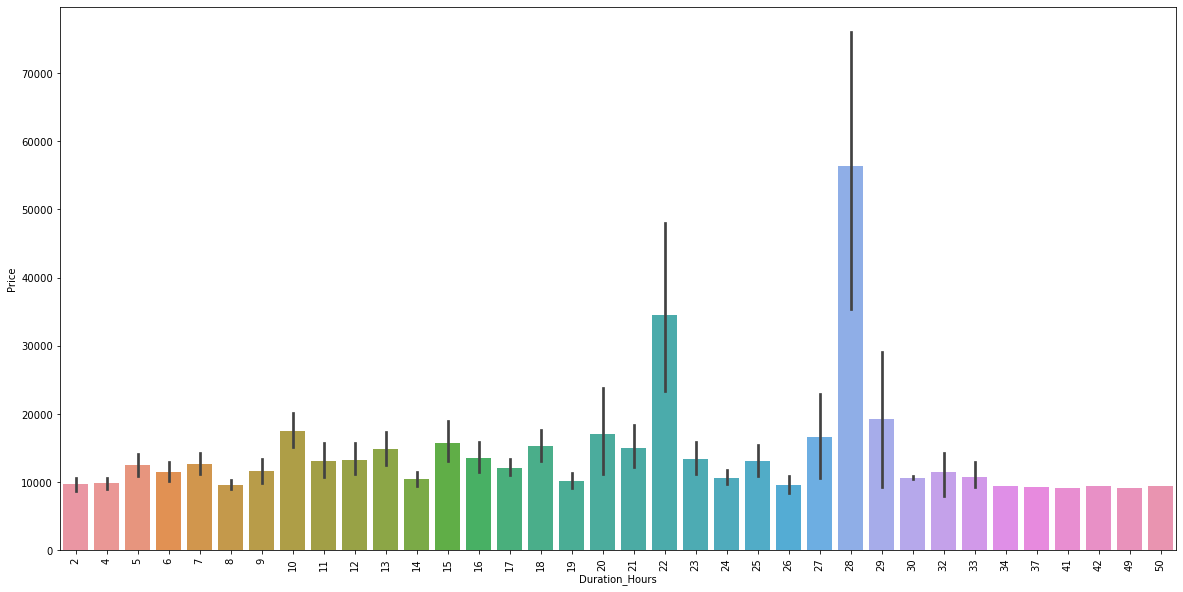

In [675]:
#Plotting barplot
plt.figure(figsize=(20,10))
sns.barplot(x=data['Duration_Hours'],y=data['Price'],data=data)
plt.xticks(rotation='vertical')
plt.show()

**IN this plot we can see that the  duration hours which 28 hours have the highest ticket price.**

# CHECKING DATA OF HIGHEST PRICES(TOP 10)

In [71]:
#checking for the highest prices and airline names,source
highest=data.sort_values(by='Price',ascending=False)[:10]
highest

,Airline Name,Source,Departure From,Destination,Total Stops,Price,Day,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
578,Qatar Airways,Qatar Airways,GOIGoa Intl,DELIndira Gandhi Intl,1 stop,114010,4,2,4,5,2,5,22,0
577,Qatar Airways,Qatar Airways,GOIGoa Intl,DELIndira Gandhi Intl,1 stop,111621,4,2,4,5,8,25,28,20
287,Qatar Airways,Gotogate,GOI Goa Intl,DEL Indira Gandhi Intl,1 stop,105587,3,2,4,5,8,25,28,20
286,Qatar Airways,Qatar Airways,GOI Goa Intl,DEL Indira Gandhi Intl,1 stop,104864,3,2,4,5,2,5,22,0
576,Qatar Airways,Qatar Airways,GOIGoa Intl,DELIndira Gandhi Intl,1 stop,101998,4,2,4,5,2,20,22,15
575,Qatar Airways,Qatar Airways,GOIGoa Intl,DELIndira Gandhi Intl,1 stop,100197,4,2,4,5,8,10,28,5
285,Qatar Airways,FlightNetwork,GOI Goa Intl,DEL Indira Gandhi Intl,1 stop,94327,3,2,4,5,8,10,28,5
284,Qatar Airways,Qatar Airways,GOI Goa Intl,DEL Indira Gandhi Intl,1 stop,92852,3,2,4,5,2,20,22,15
1552,Qatar Airways,Qatar Airways,GOIGoa Intl,DELIndira Gandhi Intl,1 stop,90673,7,2,4,5,2,5,22,0
935,Qatar Airways,Qatar Airways,GOIGoa Intl,DELIndira Gandhi Intl,1 stop,89098,5,2,4,5,2,5,22,0


In [79]:
cat_features_highest=[]
for i in highest:
    if data[i].dtype=='object':
        cat_features_highest.append(i)
print(cat_features_highest)

['Airline Name', 'Source', 'Departure From', 'Destination', 'Total Stops']


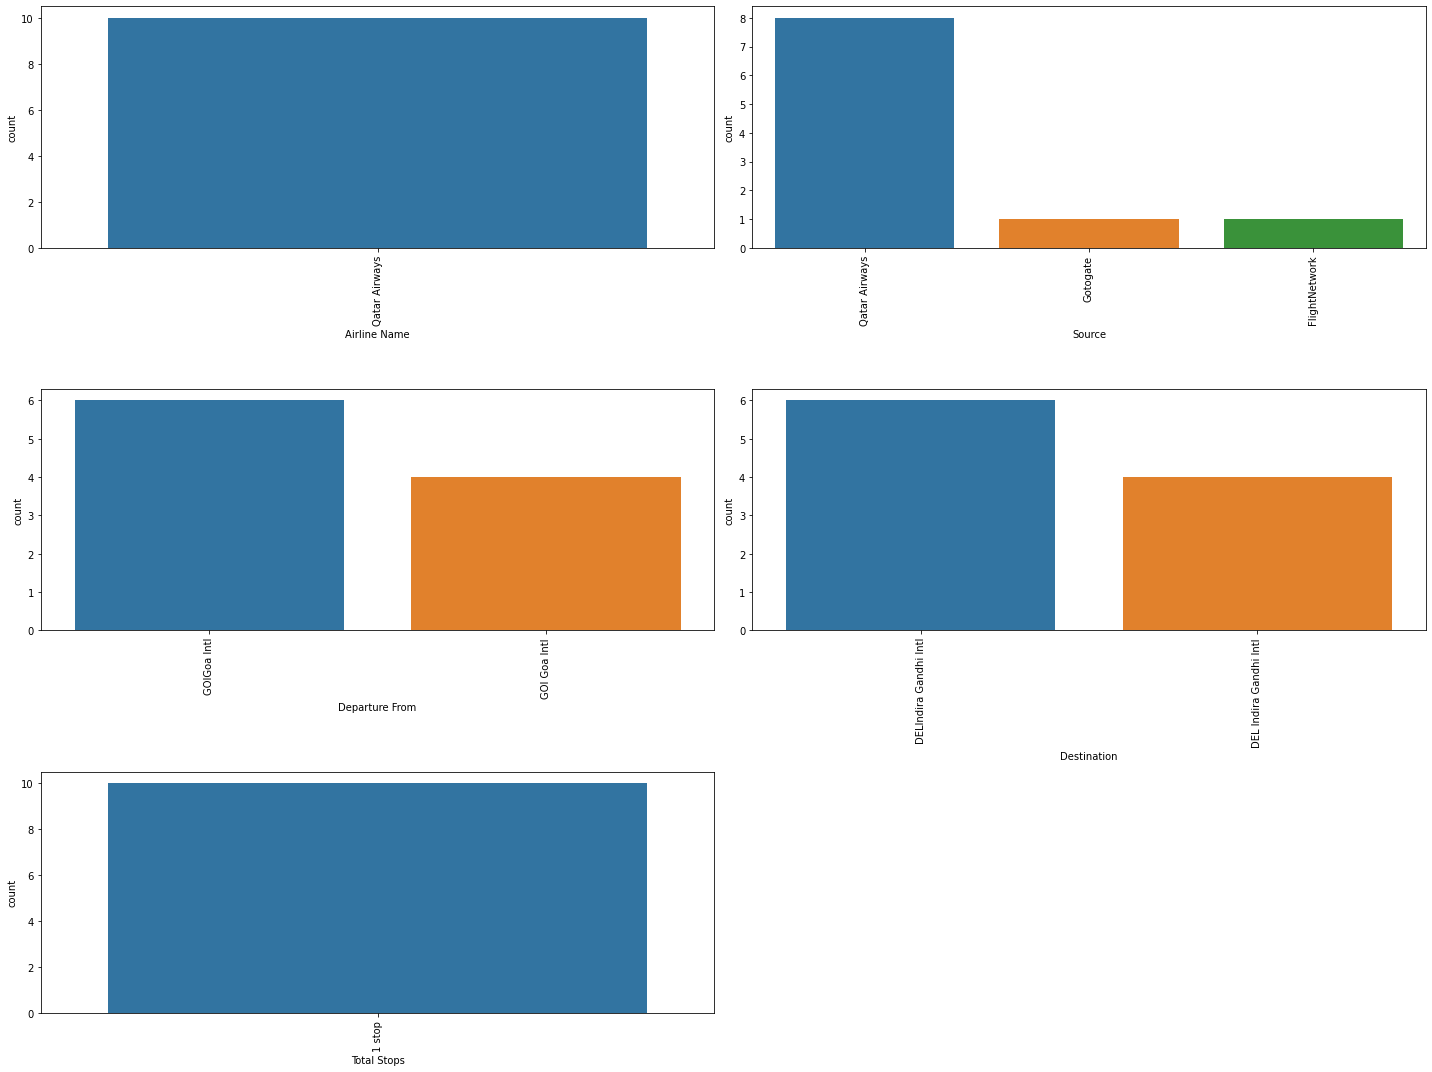

In [81]:
#plotting countplot
plt.figure(figsize=(20,15))
plotnumber=1
for column  in cat_features_highest:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(highest[column])
        plt.xticks(rotation='vertical')
    plotnumber+=1
plt.tight_layout()

**Observation**
* **In the above plots we can see the plots plotted from the data which have the highest top 10 prices  from date 3rd feb to 7th feb.**
* **So in above plots we can see that Qatar airways have the most expensive flight tickets.**
* **Again qatar airways source have the highest of the flight tickets.**
* **And while travelling all the qatar airways took only 1 stop in between.**

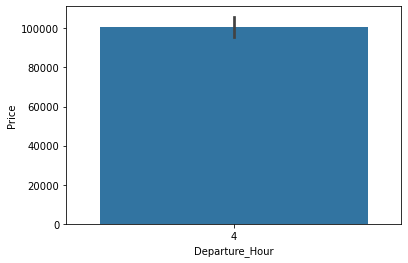

In [122]:
#plotting bar plot
sns.barplot(x='Departure_Hour',y='Price',data=highest)
plt.show()

**So in this plot we can see that whenerver qatar airways daparture time was 4am that is in the early morning, the prices of the flight tickes was always expensive.**

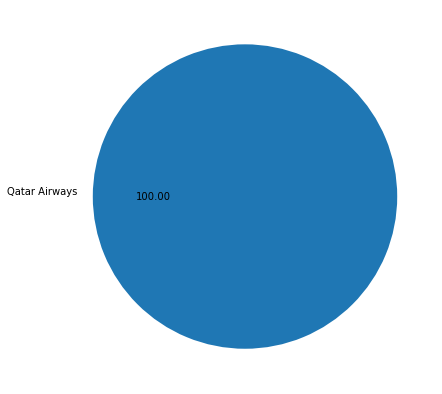

In [84]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=highest['Airline Name'].unique()
plt.pie(x=highest['Airline Name'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

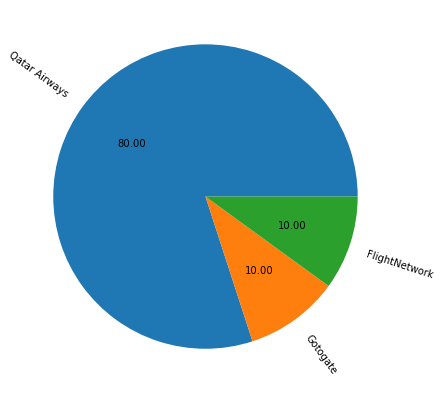

In [85]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=highest['Source'].unique()
plt.pie(x=highest['Source'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

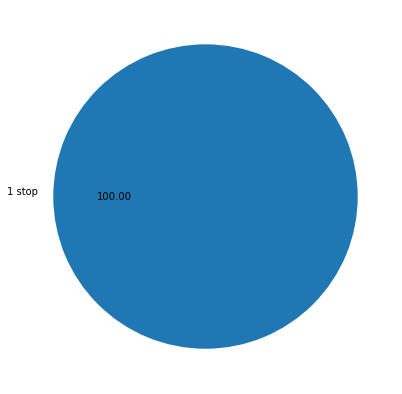

In [87]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=highest['Total Stops'].unique()
plt.pie(x=highest['Total Stops'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

# CHECKING DATA FOR LOWEST PRICES

In [88]:
#checking for the lowest prices and airline names, source
lowest=data.sort_values(by='Price',ascending=True)[:10]
lowest

,Airline Name,Source,Departure From,Destination,Total Stops,Price,Day,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
584,GoFirst,Agoda.com,GOIGoa Intl,DELIndira Gandhi Intl,direct,4722,5,2,0,35,3,0,2,25
1,GoFirst,Agoda.com,GOI Goa Intl,DEL Indira Gandhi Intl,direct,4722,3,2,0,35,3,0,2,25
1255,GoFirst,Agoda.com,GOIGoa Intl,DELIndira Gandhi Intl,direct,4722,7,2,0,35,3,0,2,25
11,Air India,EaseMyTrip,GOI Goa Intl,DEL Indira Gandhi Intl,direct,4887,3,2,1,15,3,50,2,35
585,Air India,happyfares,GOIGoa Intl,DELIndira Gandhi Intl,direct,4889,5,2,1,15,3,50,2,35
943,Air India,happyfares,GOIGoa Intl,DELIndira Gandhi Intl,direct,4889,6,2,1,15,3,50,2,35
945,GoFirst,happyfares,GOIGoa Intl,DELIndira Gandhi Intl,direct,4989,6,2,0,35,3,0,2,25
296,IndiGo,Agoda.com,GOIGoa Intl,DELIndira Gandhi Intl,1 stop,5304,4,2,2,5,9,40,7,35
14,AirAsia India,happyfares,GOI Goa Intl,DEL Indira Gandhi Intl,direct,5423,3,2,23,5,1,45,2,40
307,AirAsia India,happyfares,GOIGoa Intl,DELIndira Gandhi Intl,direct,5583,4,2,23,5,1,45,2,40


In [89]:
cat_features_lowest=[]
for i in lowest:
    if data[i].dtype=='object':
        cat_features_lowest.append(i)
print(cat_features_lowest)

['Airline Name', 'Source', 'Departure From', 'Destination', 'Total Stops']


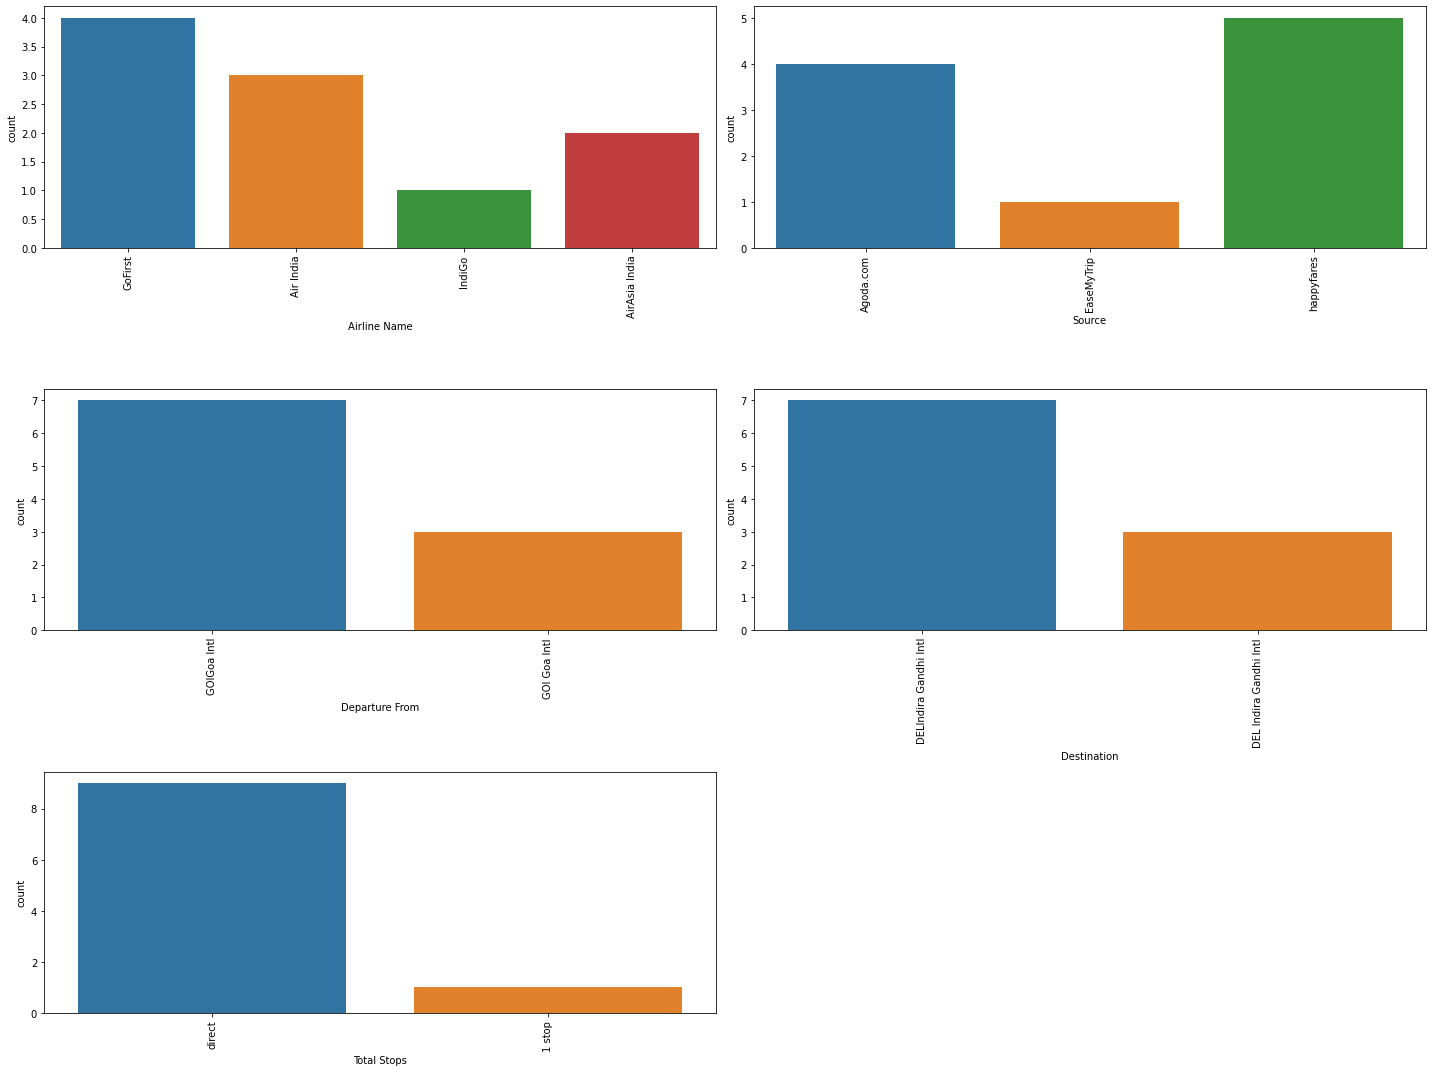

In [90]:
#plotting countplot
plt.figure(figsize=(20,15))
plotnumber=1
for column  in cat_features_lowest:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(lowest[column])
        plt.xticks(rotation='vertical')
    plotnumber+=1
plt.tight_layout()

**Observation**
* **In the above plots we can see the plots plotted from the data which have the lowest 10 prices from date 3rd feb to 7th feb.**
* **So in above plots we can see that go first,Air India, Indigo and Air asia india have the cheapest flight tickets.**
* **Agoda.com,Easemytrip and happyfares source have the lowest of the flight tickets.**
* **And while travelling most of them did'nt take any stop inbetween.**

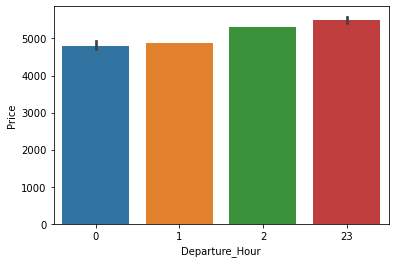

In [123]:
#plotting bar plot
sns.barplot(x='Departure_Hour',y='Price',data=lowest)
plt.show()

**In this plot we can see that when the flight departure timing was in the midnight or close to midnight that is at 12am, 1am, 2am and 11pm that time the prices of the flight tickets were cheapest.**

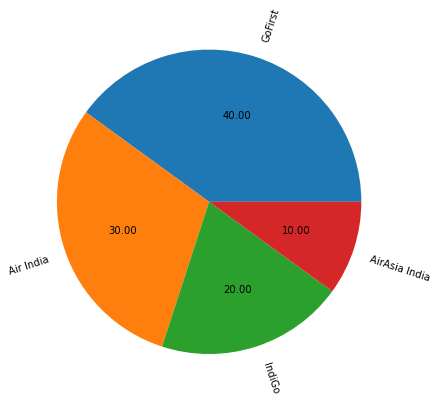

In [91]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=lowest['Airline Name'].unique()
plt.pie(x=lowest['Airline Name'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

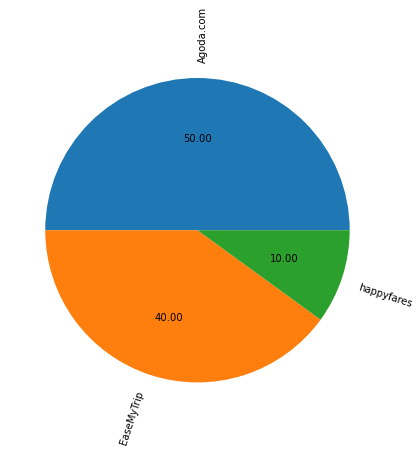

In [92]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=lowest['Source'].unique()
plt.pie(x=lowest['Source'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

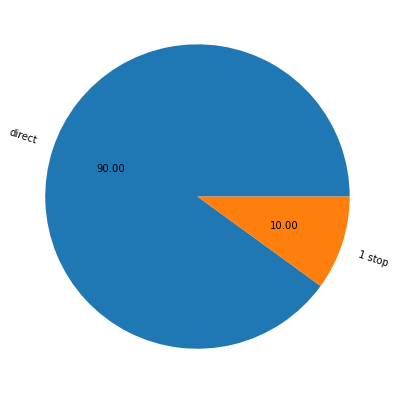

In [93]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=lowest['Total Stops'].unique()
plt.pie(x=lowest['Total Stops'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

# CHECKING DATA FOR LONGEST DURATIONS(TOP 10)

In [105]:
#checking for longest top 10 durations
duration=data.sort_values(by='Duration_Hours',ascending=False)[:10]
duration

,Airline Name,Source,Departure From,Destination,Total Stops,Price,Day,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
574,Air India,FlightsMojo,GOIGoa Intl,DELIndira Gandhi Intl,2 stops,9456,4,2,6,50,9,35,50,45
573,Air India,FlightsMojo,GOIGoa Intl,DELIndira Gandhi Intl,2 stops,9190,4,2,15,25,16,25,49,0
490,Air India,FlightsMojo,GOIGoa Intl,DELIndira Gandhi Intl,2 stops,9456,4,2,15,25,9,35,42,10
487,Air India,FlightsMojo,GOIGoa Intl,DELIndira Gandhi Intl,2 stops,9190,4,2,23,10,16,25,41,15
207,Air India,happyfares,GOI Goa Intl,DEL Indira Gandhi Intl,2 stops,9255,3,2,6,50,20,40,37,50
489,Air India,FlightsMojo,GOIGoa Intl,DELIndira Gandhi Intl,2 stops,9456,4,2,23,10,9,35,34,25
1453,Air India,Travomint,GOIGoa Intl,DELIndira Gandhi Intl,2 stops,8860,7,2,6,50,16,25,33,35
1221,Air India,FlightsMojo,GOIGoa Intl,DELIndira Gandhi Intl,2 stops,16698,6,2,6,50,16,15,33,25
766,Air India,Travomint,GOIGoa Intl,DELIndira Gandhi Intl,2 stops,8860,5,2,6,50,16,25,33,35
793,Air India,EaseMyTrip,GOIGoa Intl,DELIndira Gandhi Intl,2 stops,10240,5,2,6,50,16,15,33,25


In [106]:
cat_features_duration=[]
for i in duration:
    if data[i].dtype=='object':
        cat_features_duration.append(i)
print(cat_features_duration)

['Airline Name', 'Source', 'Departure From', 'Destination', 'Total Stops']


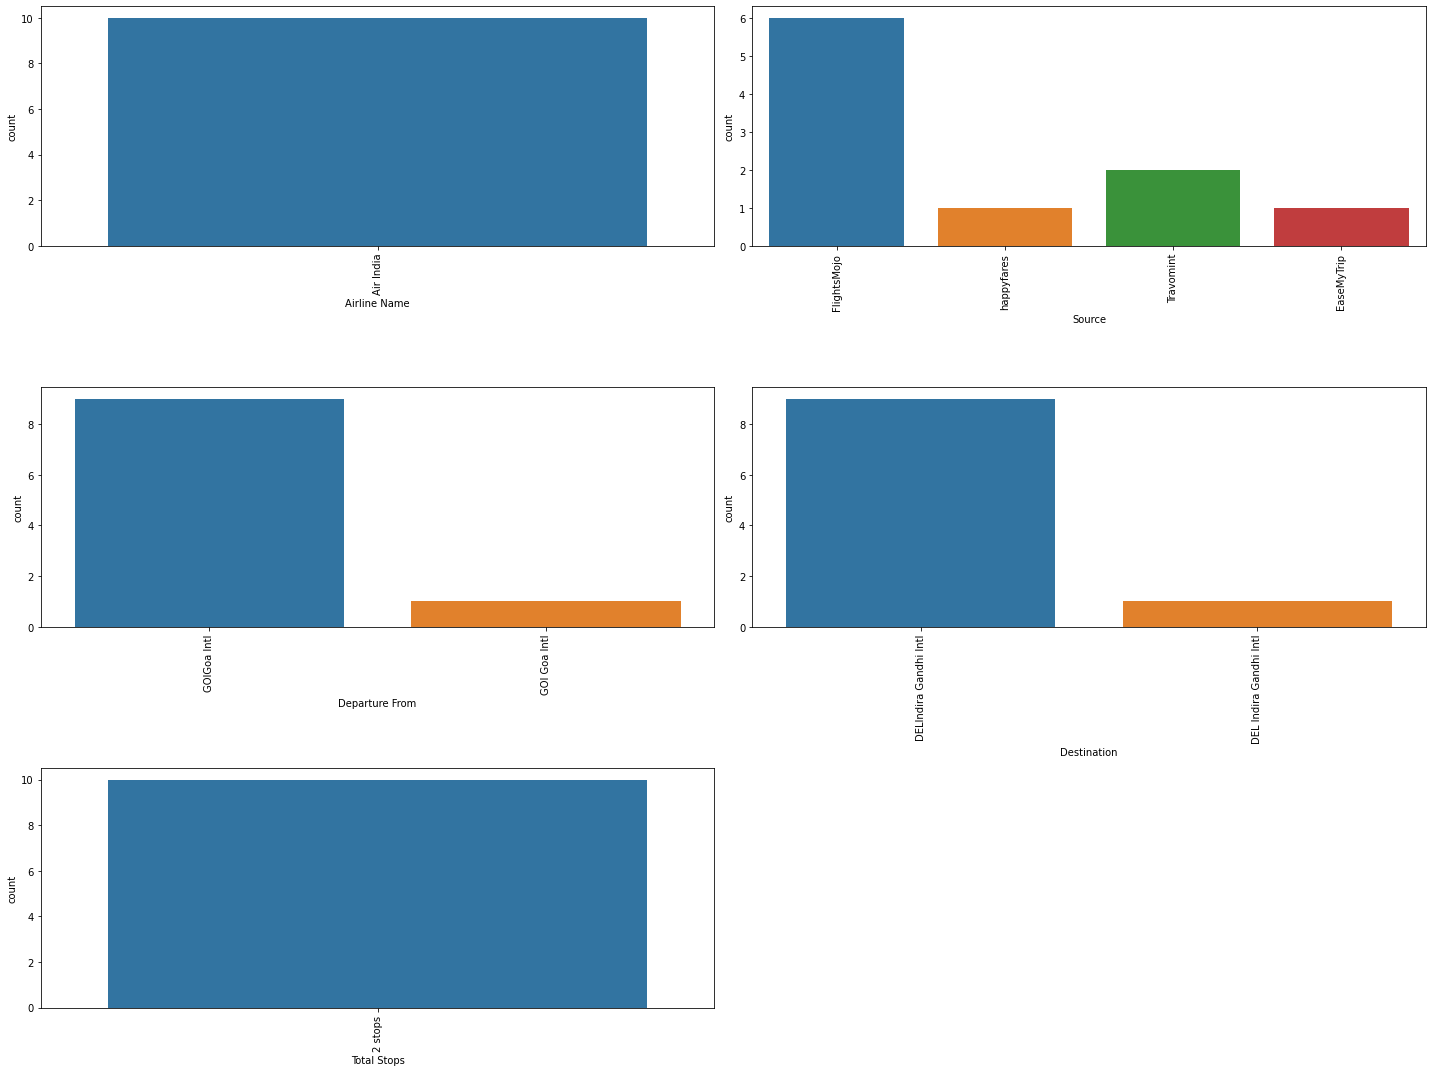

In [107]:
#plotting countplot
plt.figure(figsize=(20,15))
plotnumber=1
for column  in cat_features_duration:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(duration[column])
        plt.xticks(rotation='vertical')
    plotnumber+=1
plt.tight_layout()

**Observation**
* **In the above plots we can see the plots plotted from the data which have the top 10 highest durations from date 3rd feb to 7th feb.**
* **So in above plots we can see that Air India have the long durations.**
* **And while travelling it took 2stops.**

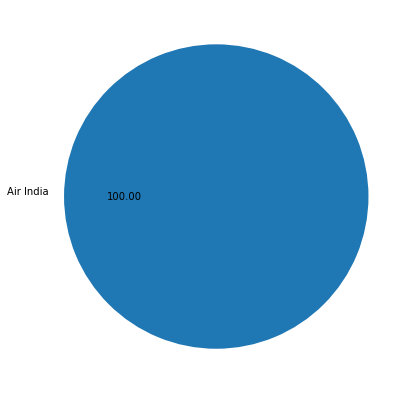

In [108]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=duration['Airline Name'].unique()
plt.pie(x=duration['Airline Name'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

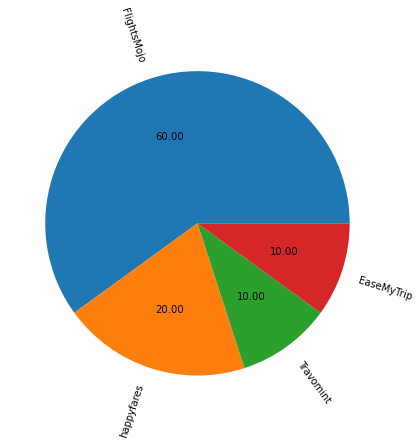

In [109]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=duration['Source'].unique()
plt.pie(x=duration['Source'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

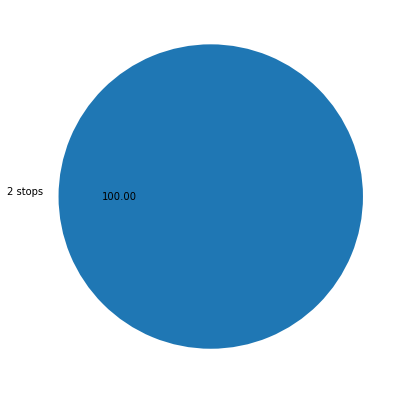

In [110]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=duration['Total Stops'].unique()
plt.pie(x=duration['Total Stops'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

In [124]:
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [125]:
#Encoding column
lab_enc=LabelEncoder()

In [126]:
# Let's convert the categorical data to numerical data for test data
for i in cat_features:
    data[i]=lab_enc.fit_transform(data[i])

In [127]:
data.head()

,Airline Name,Source,Departure From,Destination,Total Stops,Price,Day,Month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,18,11,0,0,3,6034,3,2,15,20,17,50,2,30
1,11,0,0,0,3,4722,3,2,0,35,3,0,2,25
2,18,11,0,0,3,6034,3,2,13,10,15,40,2,30
3,18,11,0,0,3,6034,3,2,14,15,16,45,2,30
4,18,11,0,0,3,6034,3,2,19,40,22,20,2,40


**So we can see that categorical columns have been encoded.**

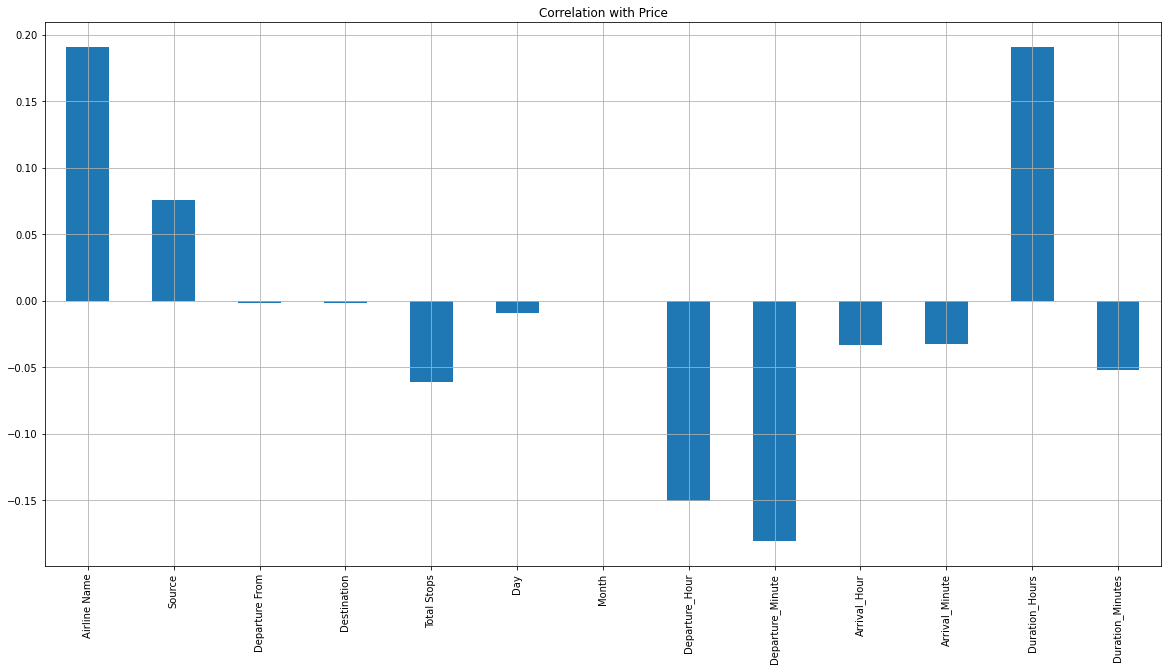

In [691]:
#Checking for correlation
data.drop(['Price'],axis=1).corrwith(data['Price']).plot(kind='bar',grid=True,figsize=(20,10),title='Correlation with Price')
plt.show()

**In this we can see that column airline name and duration hours are highly positively corelated to the price, wherein Departure hour and departure min are highly negatively corelated to the price and departure from, destination and month are very least corelated to the price.**

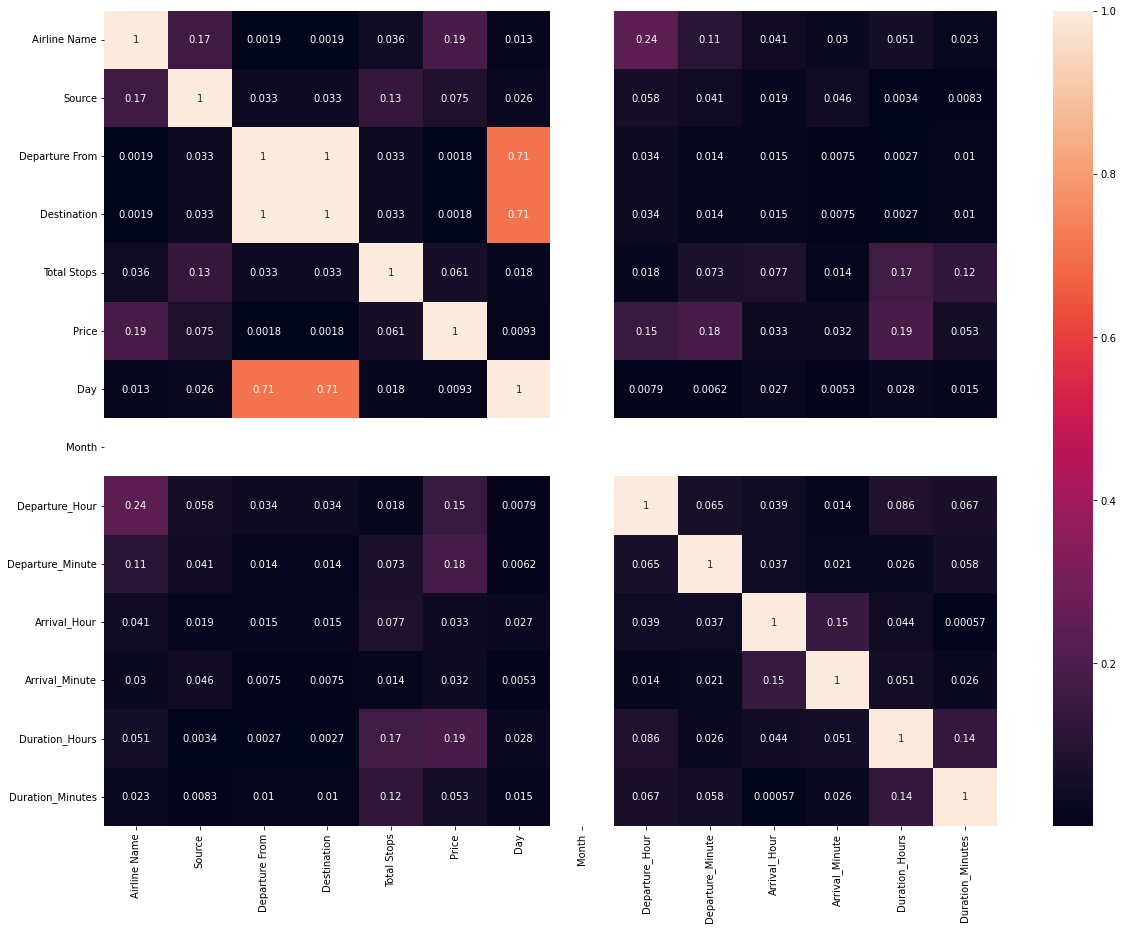

In [692]:
#Plotting heatmap
corr=data.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

**Observation**

* **In this i am considering a percenatage of 75% between the features so that they are called as multicorrelated.**
* **In this we can see that column departure from and destination are highly multicorrelated with each other.**
* **So plottig scatter plot to check the trend or relationship between them.**

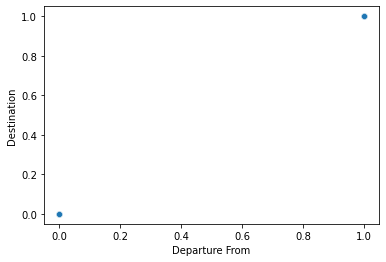

In [694]:
#plotting scatterplot
sns.scatterplot(x='Departure From',y='Destination',data=data)
plt.show()

**So we can see that it is showing a positive trend, but to cross verify further i will use vif method.**

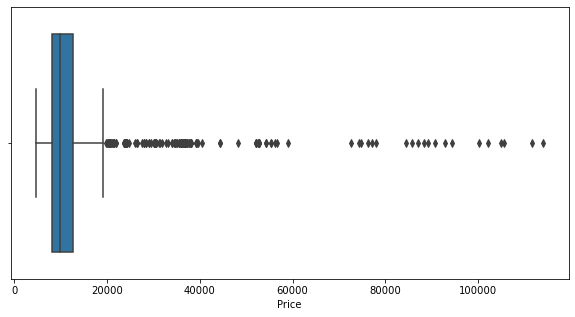

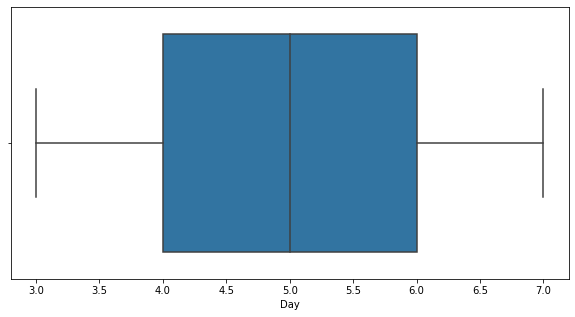

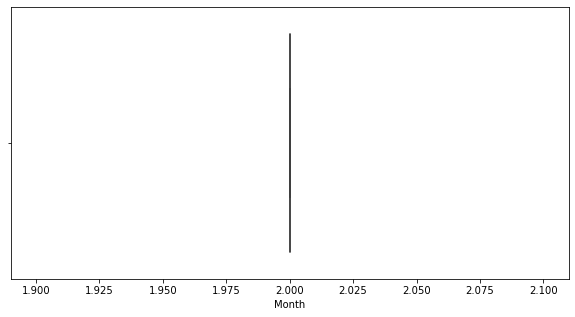

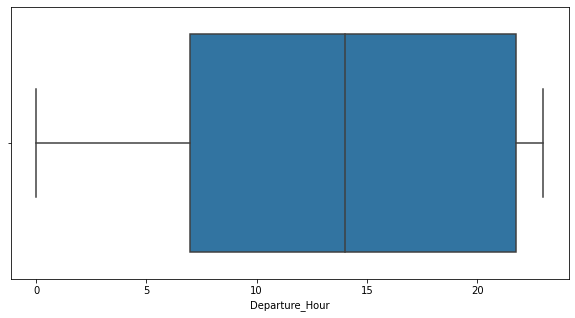

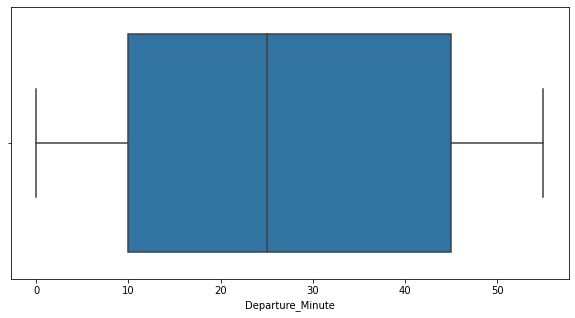

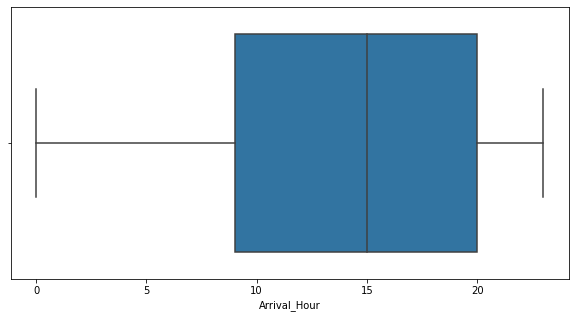

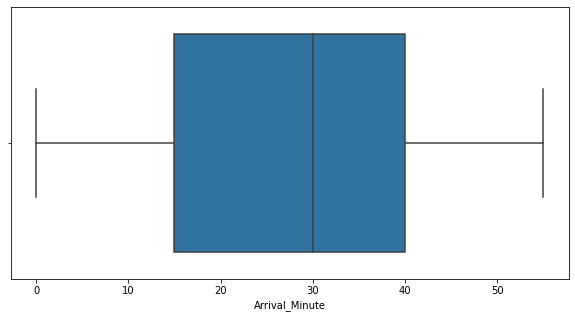

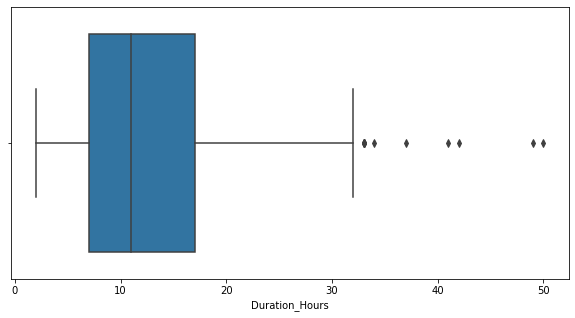

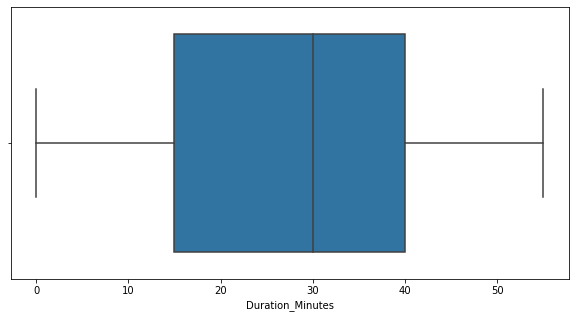

In [128]:
#plotting boxplot
for i in cont_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(data[i])
    plt.show()

**So in this plot we can see that in column duration hours outliers are present.So using z-score method to remove the outliers**

In [129]:
#Importing required libraries
from scipy.stats import zscore

In [130]:
#Removing outliers
z_score=zscore(data[['Duration_Hours']])
abs_z_score=np.abs(z_score)
threshold=3
z=(abs_z_score<3).all(axis=1)

In [131]:
data[z].shape

(1500, 14)

In [132]:
data.shape

(1506, 14)

In [133]:
#Percentage Loss of Data
data_loss=((1506-1500)/1506)*100
print(f'Data Loss:{data_loss} %')

Data Loss:0.398406374501992 %


In [134]:
data=data[z]
data.shape

(1500, 14)

In [135]:
#checking skewness
data[cont_features].skew()

Price               4.013585
Day                -0.047353
Month               0.000000
Departure_Hour     -0.137177
Departure_Minute    0.042006
Arrival_Hour       -0.532888
Arrival_Minute      0.028234
Duration_Hours      0.541729
Duration_Minutes   -0.038975
dtype: float64

**So we can see that in column arrival hour and duration hours skewness is present.so treating it by using power transform method.**

In [136]:
#Importing required libraries
from sklearn.preprocessing import power_transform

In [137]:
data[['Arrival_Hour','Duration_Hours']]=power_transform(data[['Arrival_Hour','Duration_Hours']],method='yeo-johnson')
data[['Arrival_Hour','Duration_Hours']]

,Arrival_Hour,Duration_Hours
0,0.412519,-1.913015
1,-1.538828,-1.913015
2,0.120202,-1.913015
3,0.265956,-1.913015
4,1.156175,-1.913015
...,...,...
1553,-0.311717,-0.687988
1554,-0.734282,-0.171859
1555,-0.311717,0.266426
1556,1.306860,0.887438


In [138]:
#checking skewness
data[cont_features].skew()

Price               4.013585
Day                -0.047353
Month               0.000000
Departure_Hour     -0.137177
Departure_Minute    0.042006
Arrival_Hour       -0.449715
Arrival_Minute      0.028234
Duration_Hours     -0.060234
Duration_Minutes   -0.038975
dtype: float64

In [139]:
#Dividing dataset into features and label
#Features
x=data.drop(['Price'],axis=1)
#Label
y=data['Price']

In [140]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[ 0.29123805,  1.45584814, -2.07825622, ...,  1.30649509,
        -1.91301503,  0.1131873 ],
       [-0.32492144, -1.56876711, -2.07825622, ..., -1.58790828,
        -1.91301503, -0.18530242],
       [ 0.29123805,  1.45584814, -2.07825622, ...,  0.72761441,
        -1.91301503,  0.1131873 ],
       ...,
       [-0.500967  ,  0.63095307,  0.48117262, ..., -0.43014693,
         0.26642647,  0.1131873 ],
       [-0.500967  ,  0.63095307,  0.48117262, ..., -0.43014693,
         0.8874383 , -1.08077159],
       [-0.500967  ,  0.63095307,  0.48117262, ...,  1.30649509,
        -1.09966416,  1.60563591]])

In [141]:
x_scaler.shape

(1500, 13)

In [142]:
#Importing require libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.105152,Airline Name
1,1.052389,Source
2,inf,Departure From
3,inf,Destination
4,1.144714,Total Stops
5,2.010221,Day
6,NaN,Month
7,1.080767,Departure_Hour
8,1.027019,Departure_Minute
9,1.043867,Arrival_Hour


**In this we can see that vif value of column departure from and destination shows infinity values and also column month shows nan values so dropping this columns.**

In [144]:
X=data.drop(['Departure From','Destination','Month'],axis=1)
X

,Airline Name,Source,Total Stops,Price,Day,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,18,11,3,6034,3,15,20,0.412519,50,-1.913015,30
1,11,0,3,4722,3,0,35,-1.538828,0,-1.913015,25
2,18,11,3,6034,3,13,10,0.120202,40,-1.913015,30
3,18,11,3,6034,3,14,15,0.265956,45,-1.913015,30
4,18,11,3,6034,3,19,40,1.156175,20,-1.913015,40
...,...,...,...,...,...,...,...,...,...,...,...
1553,9,8,0,37114,7,5,10,-0.311717,20,-0.687988,10
1554,9,8,0,37114,7,22,50,-0.734282,30,-0.171859,40
1555,9,8,0,37114,7,22,50,-0.311717,20,0.266426,30
1556,9,8,0,37114,7,5,10,1.306860,20,0.887438,10


In [145]:
X.shape

(1500, 11)

In [146]:
#importing required libraries
from sklearn.feature_selection import SelectKBest, f_classif

In [147]:
best_features=SelectKBest(score_func=f_classif,k=9)
fit=best_features.fit(x,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([data_columns,data_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(9,'Score'))

        Feature_Name      Score
0       Airline Name  48.684590
4        Total Stops  34.942029
1             Source  32.884953
11    Duration_Hours   5.499829
7     Departure_Hour   4.874255
8   Departure_Minute   3.600474
5                Day   1.888289
2     Departure From   1.667693
3        Destination   1.667693


In [148]:
new_feature=data[['Airline Name','Total Stops','Source','Duration_Hours','Departure_Hour','Departure_Minute','Day','Departure From','Destination']]
new_feature

,Airline Name,Total Stops,Source,Duration_Hours,Departure_Hour,Departure_Minute,Day,Departure From,Destination
0,18,3,11,-1.913015,15,20,3,0,0
1,11,3,0,-1.913015,0,35,3,0,0
2,18,3,11,-1.913015,13,10,3,0,0
3,18,3,11,-1.913015,14,15,3,0,0
4,18,3,11,-1.913015,19,40,3,0,0
...,...,...,...,...,...,...,...,...,...
1553,9,0,8,-0.687988,5,10,7,1,1
1554,9,0,8,-0.171859,22,50,7,1,1
1555,9,0,8,0.266426,22,50,7,1,1
1556,9,0,8,0.887438,5,10,7,1,1


In [149]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(new_feature)
x_scaler

array([[ 0.29123805,  2.93473961,  1.45584814, ..., -1.47065625,
        -2.07825622, -2.07825622],
       [-0.32492144,  2.93473961, -1.56876711, ..., -1.47065625,
        -2.07825622, -2.07825622],
       [ 0.29123805,  2.93473961,  1.45584814, ..., -1.47065625,
        -2.07825622, -2.07825622],
       ...,
       [-0.500967  , -0.62395838,  0.63095307, ...,  1.42148976,
         0.48117262,  0.48117262],
       [-0.500967  , -0.62395838,  0.63095307, ...,  1.42148976,
         0.48117262,  0.48117262],
       [-0.500967  , -0.62395838,  0.63095307, ...,  1.42148976,
         0.48117262,  0.48117262]])

In [150]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

**Xtreme Gradient Regressor**

In [151]:
xgb=xgb.XGBRegressor()

In [724]:
#using range fucntion to find the best random state using xgb regressor
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=i)
    xgb.fit(x_train,y_train)
    pred=xgb.predict(x_train)
    y_pred=xgb.predict(x_test)
    print(f'at random state {i}, training accuracy is {metrics.r2_score(y_train,pred)*100}')
    print(f'at random state {i}, testing accuracy is {metrics.r2_score(y_test,y_pred)*100}')
    print('\n')

at random state 0, training accuracy is 99.73361148522942
at random state 0, testing accuracy is 91.60170839027992


at random state 1, training accuracy is 99.74344990288883
at random state 1, testing accuracy is 96.91517972026188


at random state 2, training accuracy is 99.6996449098403
at random state 2, testing accuracy is 97.36083346387852


at random state 3, training accuracy is 99.7114797639271
at random state 3, testing accuracy is 96.64015780420165


at random state 4, training accuracy is 99.74388417233725
at random state 4, testing accuracy is 97.0639674394954


at random state 5, training accuracy is 99.64585871052277
at random state 5, testing accuracy is 97.10697604230793


at random state 6, training accuracy is 99.68816131863188
at random state 6, testing accuracy is 96.90543536474034


at random state 7, training accuracy is 99.70178865386539
at random state 7, testing accuracy is 91.22086713666756


at random state 8, training accuracy is 99.66833849917917
at random

**Taking random state=198**

In [152]:
#since random state  has highest testing score,so taking random state as 198
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=198)

In [153]:
#Training the Model
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [784]:
pred=xgb.predict(x_train)
y_pred=xgb.predict(x_test)

In [785]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 99.73809783072471

 Testing Score: 97.93582766597704


In [729]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [730]:
#Checking cross validation score for xgb regressor
for j in range(2,6):
    cv_score=cross_val_score(xgb,x_scaler,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is {cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is 0.689733881216619and accuracy for the testing is 0.9793582766597705


at cross fold 3 the cv score is -0.3948885925971659and accuracy for the testing is 0.9793582766597705


at cross fold 4 the cv score is 0.8525033845973793and accuracy for the testing is 0.9793582766597705


at cross fold 5 the cv score is 0.8589247684934881and accuracy for the testing is 0.9793582766597705




**taking cv=5**

In [731]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

1196.2859772135416

In [732]:
#mean squared error
mean_squared_error(y_test,y_pred)

4400471.038814388

In [733]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

2097.729972807365

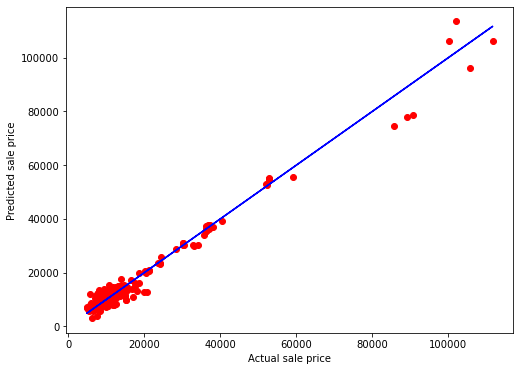

In [734]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual sale price',fontsize=10)
plt.ylabel('Predicted sale price',fontsize=10)
plt.show()

**Gradient Boosting**

In [154]:
#Instantiating Gradient Boosting
gb=GradientBoostingRegressor()

In [155]:
#since random state  has highest testing score,so taking random state as 198
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=198)

In [156]:
#Training the Model
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [738]:
pred=gb.predict(x_train)
y_pred=gb.predict(x_test)

In [739]:
#Printing Training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 94.25087641421463

 Testing score: 95.364074252054


In [740]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [741]:
#Checking cross validation score for gradient boosting
cv_score=cross_val_score(gb,x_scaler,y,cv=5).mean()
cv_score

0.8694426809443756

In [742]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

1947.278677394768

In [743]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

9883020.25740816

In [744]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

3143.7271283316177

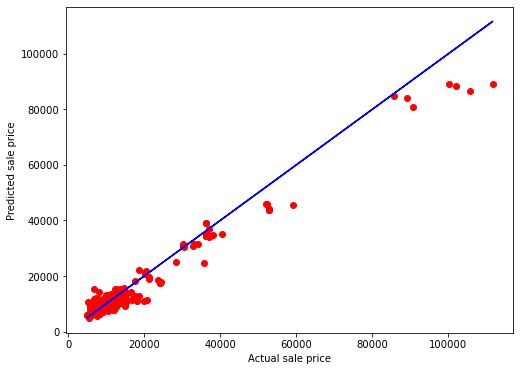

In [745]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual sale price',fontsize=10)
plt.ylabel('Predicted sale price',fontsize=10)
plt.show()

**Ada Boost**

In [157]:
#Instantiating Ada Boost Regressor
ada=AdaBoostRegressor()

In [158]:
#since random state  has highest testing score,so taking random state as 198
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=198)

In [159]:
#Training the data
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [749]:
pred=ada.predict(x_train)
y_pred=ada.predict(x_test)

In [750]:
#Printing Training and Testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 64.47132887814682

 Testing Score: 77.31966391878323


In [751]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [752]:
#Checking cross validation score for Ada boost
cv_score=cross_val_score(ada,x_scaler,y,cv=5).mean()
cv_score

0.5617863976561621

In [753]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

6097.145075381478

In [754]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

48350692.63885482

In [755]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

6953.466231948985

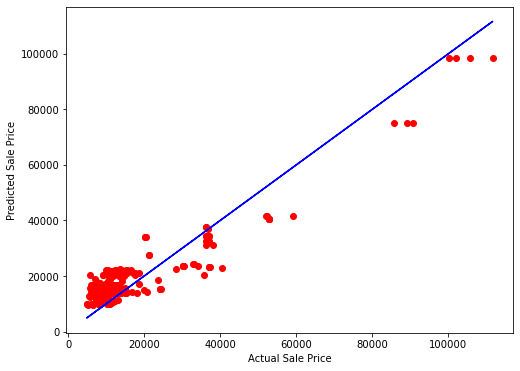

In [756]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Sale Price',fontsize=10)
plt.ylabel('Predicted Sale Price',fontsize=10)
plt.show()

**Random Forest Classifier**

In [160]:
#Instantiating Random forest regressor
rf=RandomForestRegressor()

In [161]:
#since random state  has highest testing score,so taking random state as 198
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=198)

In [162]:
#Training data
rf.fit(x_train,y_train)

RandomForestRegressor()

In [760]:
pred=rf.predict(x_train)
y_pred=rf.predict(x_test)

In [761]:
#Printing Training and Testing Score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 99.10386843979195

 Testing Score: 97.33202926577286


In [762]:
#Checking cross validation score for Random forest
cv_score=cross_val_score(rf,x_scaler,y,cv=5).mean()
cv_score

0.8887001583231793

In [763]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

1265.5883151746032

In [764]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

5687668.49301272

In [765]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

2384.883329014801

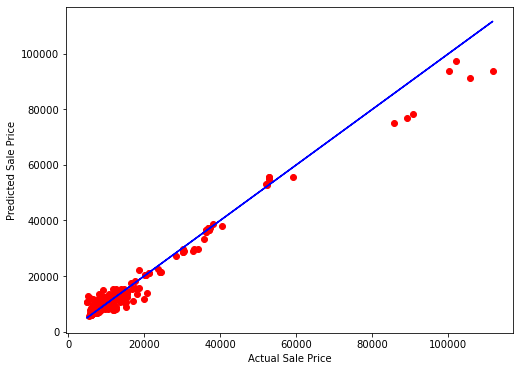

In [766]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Sale Price',fontsize=10)
plt.ylabel('Predicted Sale Price',fontsize=10)
plt.show()

In [810]:
#Making dataframe of all the models
data=pd.DataFrame({
    'Models':['XGBoost','Gradient Boosting','Ada Boost','Random forest'],
    'Training Score':[99.73,94.25,64.47,99.10],
    'Testing Score':[97.93,95.36,77.31,97.33],
    'Cros val score':[85.89,86.94,56.17,88.57],
    'RMSE':[2097.72,3143.72,6953.46,2384.88]
})
data

,Models,Training Score,Testing Score,Cros val score,RMSE
0,XGBoost,99.73,97.93,85.89,2097.72
1,Gradient Boosting,94.25,95.36,86.94,3143.72
2,Ada Boost,64.47,77.31,56.17,6953.46
3,Random forest,99.10,97.33,88.57,2384.88


**Observation**
* **In this we can see that xgb have seen  most of the data and testing score of it is also more as compared to the other models.**
* **Cross validation score score is also good and it has the less Root mean squared error as compared to other models.**
* **So going forward with XGB.**

In [163]:
#Using Grid Search cv for hyperparameter tuning for XGB
from sklearn.model_selection import GridSearchCV

In [164]:
param_grid=({
    'n_estimators': [100,200],
    'max_depth' : [2,3,4],
    'eta':[0.3,0.1,0.01],
    'subsample':[0.1,0.2,0.3],
    'colsample_bytree' :[0.4,0.5,0.6]
})

In [165]:
grid_search=GridSearchCV(xgb,param_grid=param_grid,cv=5)

In [166]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...ot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6],
                         'eta': [0.3, 0.1, 0.01], 'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200],
                         'subsample': [0.1, 0.2, 0.3]})

In [772]:
#best Parameters
grid_search.best_params_ 

{'colsample_bytree': 0.6,
 'eta': 0.3,
 'max_depth': 4,
 'n_estimators': 200,
 'subsample': 0.3}

In [788]:
#Training with the best parameters
xgb1=xgb.XGBRegressor(colsample_bytree=0.6,eta=0.3,max_depth=4,n_estimators=200,subsample=0.3)
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [789]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 99.73809783072471

 Testing Score: 97.93582766597704


In [790]:
#Checking cross validation score for XGBoost
cv_score=cross_val_score(xgb1,x_scaler,y,cv=5).mean()
cv_score

0.8870995778788291

**In this we can see that training and testing score remained same but the cross validation score increased from 85 to 87 and this model is tunes. so i will save this model.**

In [791]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

1196.2859772135416

In [792]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

4400471.038814388

In [793]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

2097.729972807365

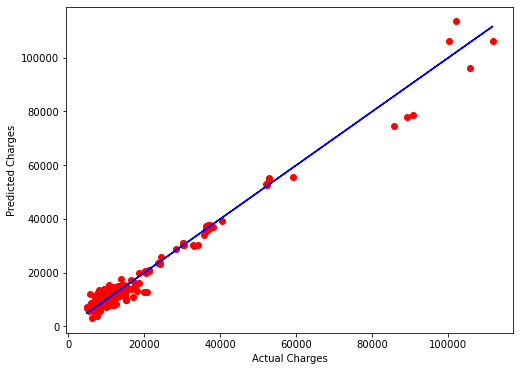

In [794]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

In [795]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(xgb1,open('Flight Price Prediction Project','wb'))